In [8]:
%load_ext autoreload
%autoreload 2
### HIER DIE METHODEN REIN WIR IN TRAINNLP 
import torch
from torch import nn

import train
import TorchRandomSeed
import modelClass
import dataloader
from torch.utils.data import SubsetRandomSampler
from time import time
seed =1
seedObject = TorchRandomSeed.TorchRandomSeed(seed=1) 

_t_start = time()

with seedObject:
    droplist = []#["BloodPressure", "Pregnancies", "Age", "SkinThickness"]
    num_epochs =30
    batch_size = 32
    test_size = 0.5 # is going to be split again in eval and test
    device = "cuda:0" if torch.cuda.is_available() else "cpu"
    #dirPath = "/home/rosario/explainable/Bachelor/"# root
    dirPath= "./" 

    modelsDirPath = dirPath+ "Models"

    print("calculating on: " +str(device))
    lr =0.1 # 0.001 slowed learningrate

    # load data
  
    #trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames, datasetType= dataloader.load_kaggle_diabetes_dataset(batch_size=batch_size)
    trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames, datasetType= dataloader.BreastCancerUCI(batch_size= batch_size, test_size=test_size)
    #trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames= dataloader.dryBeanUCI(batch_size=batch_size , droplist= droplist)
    
    #model = modelClass.Net(inputFeatures= inputFeatures, out_features=outputFeatures)
    model= modelClass.BinaryClassification2HL64N(inputFeatures= inputFeatures, outputFeatures= outputFeatures)
    modelName = model.modelName
    
    #print(random_indices_test)

    #for i,c in testloader:
    #    print(i[0])
    #    print(X_test[random_indices_test[0]])
    #    break
    
    # Backward Propergation - loss and optimizer
    loss_function = nn.CrossEntropyLoss()
    #optimizer = torch.optim.SGD(model.parameters(),lr=lr)
    optimizer = torch.optim.Adam(model.parameters())
    #grads = train.train(trainloader, model, num_epochs, device, y_train,loss_function, optimizer)    
    total_gradientsList =  train.train(trainloader,random_indices_train, testloader,random_indices_test, model, num_epochs, device, y_train, y_test, loss_function, optimizer)
 
    #train.train(trainloader,random_indices_train, testloader,random_indices_test, model, num_epochs, device, y_train, y_test, loss_function, optimizer)
    print(dirPath)

    import evalModel
    import plotResults
    from matplotlib import pyplot as plt
    print("evaluating ...")
    loaderList = [testloader]
    nameList = ["test"]
    yList = [y_test]
    evalModel.doALLeval(model, modelsDirPath, dirPath, loaderList, device,optimizer, loss_function, num_epochs, nameList, yList, inputFeatures, random_indices_test)
    #print(dirPath)
    print(modelsDirPath)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
calculating on: cpu
(569,)
(569, 30)
tensor([[-0.2435, -0.2473,  0.2055,  ..., -0.3219, -0.3210, -0.3220],
        [-0.2397, -0.2066,  0.1991,  ..., -0.3178, -0.3167, -0.3183],
        [-0.2316, -0.2095,  0.2728,  ..., -0.3239, -0.3222, -0.3240],
        ...,
        [-0.2447, -0.1818,  0.2593,  ..., -0.3372, -0.3360, -0.3371],
        [-0.2309, -0.2157,  0.2257,  ..., -0.3165, -0.3153, -0.3164],
        [-0.2343, -0.2549,  0.2200,  ..., -0.3162, -0.3152, -0.3164]])
train:shuffel = False
eval:shuffel = False
Epoch: 0
      Training_acc: 0.6161971830985915
-------------------

Epoch: 1
      Training_acc: 0.6161971830985915
-------------------

Epoch: 2
      Training_acc: 0.6161971830985915
-------------------

Epoch: 3
      Training_acc: 0.6161971830985915
-------------------

Epoch: 4
      Training_acc: 0.6161971830985915
-------------------

Epoch: 5
      Training_acc: 0.6197183098591549
-----

0it [00:00, ?it/s]

(1, 29, 30)


1it [00:00,  4.04it/s]

(2, 29, 30)


2it [00:00,  3.74it/s]

(3, 29, 30)


3it [00:00,  3.83it/s]

(4, 29, 30)


4it [00:01,  3.82it/s]

(5, 29, 30)


5it [00:01,  3.87it/s]

(6, 29, 30)


6it [00:01,  3.83it/s]

(7, 29, 30)


7it [00:01,  3.81it/s]

(8, 29, 30)


8it [00:02,  3.78it/s]

(9, 29, 30)


9it [00:02,  3.53it/s]

Progess: 2.96%
test acc: 63.86%
test Loss: 0.68
-------------------
(10, 29, 30)


10it [00:02,  3.36it/s]

(11, 29, 30)


11it [00:03,  3.23it/s]

(12, 29, 30)


12it [00:03,  3.38it/s]

(13, 29, 30)


13it [00:03,  3.55it/s]

(14, 29, 30)


14it [00:03,  3.63it/s]

(15, 29, 30)


15it [00:04,  3.78it/s]

(16, 29, 30)


16it [00:04,  3.82it/s]

(17, 29, 30)


17it [00:04,  3.83it/s]

(18, 29, 30)


18it [00:04,  3.85it/s]

Progess: 6.30%
test acc: 63.86%
test Loss: 0.67
-------------------
(19, 29, 30)


19it [00:05,  3.82it/s]

(20, 29, 30)


20it [00:05,  3.85it/s]

(21, 29, 30)


21it [00:05,  3.94it/s]

(22, 29, 30)


22it [00:05,  4.02it/s]

(23, 29, 30)


23it [00:06,  3.99it/s]

(24, 29, 30)


24it [00:06,  3.95it/s]

(25, 29, 30)


25it [00:06,  3.93it/s]

(26, 29, 30)


26it [00:06,  3.92it/s]

(27, 29, 30)


27it [00:07,  3.73it/s]

Progess: 9.63%
test acc: 63.86%
test Loss: 0.67
-------------------
(28, 29, 30)


28it [00:07,  3.73it/s]

(29, 29, 30)


29it [00:07,  3.69it/s]

(30, 29, 30)


30it [00:08,  3.68it/s]

(31, 29, 30)


31it [00:08,  3.64it/s]

(32, 29, 30)


32it [00:08,  3.54it/s]

(33, 29, 30)


33it [00:08,  3.65it/s]

(34, 29, 30)


34it [00:09,  3.75it/s]

(35, 29, 30)


35it [00:09,  3.82it/s]

(36, 29, 30)


36it [00:09,  3.93it/s]

Progess: 12.96%
test acc: 63.86%
test Loss: 0.67
-------------------
(37, 29, 30)


37it [00:09,  3.99it/s]

(38, 29, 30)


38it [00:10,  3.89it/s]

(39, 29, 30)


39it [00:10,  3.97it/s]

(40, 29, 30)


40it [00:10,  3.99it/s]

(41, 29, 30)


41it [00:10,  3.98it/s]

(42, 29, 30)


42it [00:11,  3.95it/s]

(43, 29, 30)


43it [00:11,  3.95it/s]

(44, 29, 30)


44it [00:11,  3.90it/s]

(45, 29, 30)


45it [00:11,  3.88it/s]

Progess: 16.30%
test acc: 63.86%
test Loss: 0.66
-------------------
(46, 29, 30)


46it [00:12,  3.90it/s]

(47, 29, 30)


47it [00:12,  3.84it/s]

(48, 29, 30)


48it [00:12,  3.79it/s]

(49, 29, 30)


49it [00:12,  3.77it/s]

(50, 29, 30)


50it [00:13,  3.87it/s]

(51, 29, 30)


51it [00:13,  3.74it/s]

(52, 29, 30)


52it [00:13,  3.57it/s]

(53, 29, 30)


53it [00:14,  3.49it/s]

(54, 29, 30)


54it [00:14,  3.46it/s]

Progess: 19.63%
test acc: 64.21%
test Loss: 0.66
-------------------
(55, 29, 30)


55it [00:14,  3.55it/s]

(56, 29, 30)


56it [00:14,  3.71it/s]

(57, 29, 30)


57it [00:15,  3.85it/s]

(58, 29, 30)


58it [00:15,  3.91it/s]

(59, 29, 30)


59it [00:15,  3.93it/s]

(60, 29, 30)


60it [00:15,  3.99it/s]

(61, 29, 30)


61it [00:16,  3.81it/s]

(62, 29, 30)


62it [00:16,  3.82it/s]

(63, 29, 30)


63it [00:16,  3.89it/s]

Progess: 22.96%
test acc: 68.03%
test Loss: 0.65
-------------------
(64, 29, 30)


64it [00:16,  3.98it/s]

(65, 29, 30)


65it [00:17,  4.03it/s]

(66, 29, 30)


66it [00:17,  4.01it/s]

(67, 29, 30)


67it [00:17,  3.88it/s]

(68, 29, 30)


68it [00:17,  3.93it/s]

(69, 29, 30)


69it [00:18,  3.99it/s]

(70, 29, 30)


70it [00:18,  4.01it/s]

(71, 29, 30)


71it [00:18,  3.95it/s]

(72, 29, 30)


72it [00:18,  4.05it/s]

Progess: 26.30%
test acc: 76.76%
test Loss: 0.65
-------------------
(73, 29, 30)


73it [00:19,  4.13it/s]

(74, 29, 30)


74it [00:19,  4.01it/s]

(75, 29, 30)


75it [00:19,  3.93it/s]

(76, 29, 30)


76it [00:19,  3.99it/s]

(77, 29, 30)


77it [00:20,  4.05it/s]

(78, 29, 30)


78it [00:20,  3.99it/s]

(79, 29, 30)


79it [00:20,  3.89it/s]

(80, 29, 30)


80it [00:20,  3.96it/s]

(81, 29, 30)


81it [00:21,  4.04it/s]

Progess: 29.63%
test acc: 83.24%
test Loss: 0.65
-------------------
(82, 29, 30)


82it [00:21,  4.02it/s]

(83, 29, 30)


83it [00:21,  4.04it/s]

(84, 29, 30)


84it [00:21,  4.10it/s]

(85, 29, 30)


85it [00:22,  4.09it/s]

(86, 29, 30)


86it [00:22,  4.10it/s]

(87, 29, 30)


87it [00:22,  4.15it/s]

(88, 29, 30)


88it [00:22,  4.00it/s]

(89, 29, 30)


89it [00:23,  4.01it/s]

(90, 29, 30)


90it [00:23,  4.02it/s]

Progess: 32.96%
test acc: 87.45%
test Loss: 0.64
-------------------
(91, 29, 30)


91it [00:23,  4.08it/s]

(92, 29, 30)


92it [00:23,  4.12it/s]

(93, 29, 30)


93it [00:24,  3.99it/s]

(94, 29, 30)


94it [00:24,  3.90it/s]

(95, 29, 30)


95it [00:24,  3.81it/s]

(96, 29, 30)


96it [00:24,  3.70it/s]

(97, 29, 30)


97it [00:25,  3.69it/s]

(98, 29, 30)


98it [00:25,  3.62it/s]

(99, 29, 30)


99it [00:25,  3.60it/s]

Progess: 36.30%
test acc: 89.32%
test Loss: 0.63
-------------------
(100, 29, 30)


100it [00:26,  3.55it/s]

(101, 29, 30)


101it [00:26,  3.55it/s]

(102, 29, 30)


102it [00:26,  3.64it/s]

(103, 29, 30)


103it [00:26,  3.63it/s]

(104, 29, 30)


104it [00:27,  3.59it/s]

(105, 29, 30)


105it [00:27,  3.65it/s]

(106, 29, 30)


106it [00:27,  3.68it/s]

(107, 29, 30)


107it [00:27,  3.73it/s]

(108, 29, 30)


108it [00:28,  3.64it/s]

Progess: 39.63%
test acc: 90.18%
test Loss: 0.62
-------------------
(109, 29, 30)


109it [00:28,  3.65it/s]

(110, 29, 30)


110it [00:28,  3.65it/s]

(111, 29, 30)


111it [00:29,  3.68it/s]

(112, 29, 30)


112it [00:29,  3.65it/s]

(113, 29, 30)


113it [00:29,  3.70it/s]

(114, 29, 30)


114it [00:29,  3.68it/s]

(115, 29, 30)


115it [00:30,  3.78it/s]

(116, 29, 30)


116it [00:30,  3.69it/s]

(117, 29, 30)


117it [00:30,  3.75it/s]

Progess: 42.96%
test acc: 90.14%
test Loss: 0.62
-------------------
(118, 29, 30)


118it [00:30,  3.81it/s]

(119, 29, 30)


119it [00:31,  3.84it/s]

(120, 29, 30)


120it [00:31,  3.95it/s]

(121, 29, 30)


121it [00:31,  4.02it/s]

(122, 29, 30)


122it [00:31,  4.00it/s]

(123, 29, 30)


123it [00:32,  3.98it/s]

(124, 29, 30)


124it [00:32,  3.92it/s]

(125, 29, 30)


125it [00:32,  3.94it/s]

(126, 29, 30)


126it [00:32,  3.94it/s]

Progess: 46.30%
test acc: 90.14%
test Loss: 0.61
-------------------
(127, 29, 30)


127it [00:33,  3.95it/s]

(128, 29, 30)


128it [00:33,  3.90it/s]

(129, 29, 30)


129it [00:33,  3.90it/s]

(130, 29, 30)


130it [00:33,  3.91it/s]

(131, 29, 30)


131it [00:34,  3.87it/s]

(132, 29, 30)


132it [00:34,  3.89it/s]

(133, 29, 30)


133it [00:34,  3.94it/s]

(134, 29, 30)


134it [00:34,  3.92it/s]

(135, 29, 30)


135it [00:35,  3.99it/s]

Progess: 49.63%
test acc: 90.06%
test Loss: 0.60
-------------------
(136, 29, 30)


136it [00:35,  3.96it/s]

(137, 29, 30)


137it [00:35,  3.92it/s]

(138, 29, 30)


138it [00:35,  4.00it/s]

(139, 29, 30)


139it [00:36,  4.05it/s]

(140, 29, 30)


140it [00:36,  4.06it/s]

(141, 29, 30)


141it [00:36,  4.00it/s]

(142, 29, 30)


142it [00:37,  3.88it/s]

(143, 29, 30)


143it [00:37,  3.84it/s]

(144, 29, 30)


144it [00:37,  3.71it/s]

Progess: 52.96%
test acc: 90.02%
test Loss: 0.59
-------------------
(145, 29, 30)


145it [00:37,  3.74it/s]

(146, 29, 30)


146it [00:38,  3.79it/s]

(147, 29, 30)


147it [00:38,  3.78it/s]

(148, 29, 30)


148it [00:38,  3.76it/s]

(149, 29, 30)


149it [00:38,  3.82it/s]

(150, 29, 30)


150it [00:39,  3.94it/s]

(151, 29, 30)


151it [00:39,  3.82it/s]

(152, 29, 30)


152it [00:39,  3.90it/s]

(153, 29, 30)


153it [00:39,  3.94it/s]

Progess: 56.30%
test acc: 90.06%
test Loss: 0.58
-------------------
(154, 29, 30)


154it [00:40,  3.88it/s]

(155, 29, 30)


155it [00:40,  3.90it/s]

(156, 29, 30)


156it [00:40,  3.92it/s]

(157, 29, 30)


157it [00:40,  3.94it/s]

(158, 29, 30)


158it [00:41,  3.86it/s]

(159, 29, 30)


159it [00:41,  3.77it/s]

(160, 29, 30)


160it [00:41,  3.88it/s]

(161, 29, 30)


161it [00:41,  3.92it/s]

(162, 29, 30)


162it [00:42,  3.99it/s]

Progess: 59.63%
test acc: 90.10%
test Loss: 0.57
-------------------
(163, 29, 30)


163it [00:42,  4.09it/s]

(164, 29, 30)


164it [00:42,  4.04it/s]

(165, 29, 30)


165it [00:42,  4.06it/s]

(166, 29, 30)


166it [00:43,  4.08it/s]

(167, 29, 30)


167it [00:43,  4.04it/s]

(168, 29, 30)


168it [00:43,  4.00it/s]

(169, 29, 30)


169it [00:43,  3.93it/s]

(170, 29, 30)


170it [00:44,  3.88it/s]

(171, 29, 30)


171it [00:44,  3.82it/s]

Progess: 62.96%
test acc: 90.02%
test Loss: 0.57
-------------------
(172, 29, 30)


172it [00:44,  3.84it/s]

(173, 29, 30)


173it [00:44,  3.89it/s]

(174, 29, 30)


174it [00:45,  3.92it/s]

(175, 29, 30)


175it [00:45,  4.03it/s]

(176, 29, 30)


176it [00:45,  4.02it/s]

(177, 29, 30)


177it [00:45,  4.00it/s]

(178, 29, 30)


178it [00:46,  3.96it/s]

(179, 29, 30)


179it [00:46,  3.89it/s]

(180, 29, 30)


180it [00:46,  3.97it/s]

Progess: 66.30%
test acc: 89.98%
test Loss: 0.56
-------------------
(181, 29, 30)


181it [00:46,  3.96it/s]

(182, 29, 30)


182it [00:47,  3.95it/s]

(183, 29, 30)


183it [00:47,  3.96it/s]

(184, 29, 30)


184it [00:47,  3.92it/s]

(185, 29, 30)


185it [00:47,  3.94it/s]

(186, 29, 30)


186it [00:48,  3.98it/s]

(187, 29, 30)


187it [00:48,  3.92it/s]

(188, 29, 30)


188it [00:48,  3.91it/s]

(189, 29, 30)


189it [00:49,  3.93it/s]

Progess: 69.63%
test acc: 89.98%
test Loss: 0.55
-------------------
(190, 29, 30)


190it [00:49,  4.02it/s]

(191, 29, 30)


191it [00:49,  4.01it/s]

(192, 29, 30)


192it [00:49,  3.90it/s]

(193, 29, 30)


193it [00:50,  3.97it/s]

(194, 29, 30)


194it [00:50,  3.93it/s]

(195, 29, 30)


195it [00:50,  3.94it/s]

(196, 29, 30)


196it [00:50,  3.86it/s]

(197, 29, 30)


197it [00:51,  3.90it/s]

(198, 29, 30)


198it [00:51,  3.94it/s]

Progess: 72.96%
test acc: 90.10%
test Loss: 0.55
-------------------
(199, 29, 30)


199it [00:51,  3.93it/s]

(200, 29, 30)


200it [00:51,  3.90it/s]

(201, 29, 30)


201it [00:52,  3.93it/s]

(202, 29, 30)


202it [00:52,  3.98it/s]

(203, 29, 30)


203it [00:52,  4.03it/s]

(204, 29, 30)


204it [00:52,  4.06it/s]

(205, 29, 30)


205it [00:53,  4.08it/s]

(206, 29, 30)


206it [00:53,  4.03it/s]

(207, 29, 30)


207it [00:53,  4.11it/s]

Progess: 76.30%
test acc: 90.10%
test Loss: 0.54
-------------------
(208, 29, 30)


208it [00:53,  4.03it/s]

(209, 29, 30)


209it [00:54,  3.97it/s]

(210, 29, 30)


210it [00:54,  4.03it/s]

(211, 29, 30)


211it [00:54,  3.93it/s]

(212, 29, 30)


212it [00:54,  3.81it/s]

(213, 29, 30)


213it [00:55,  3.44it/s]

(214, 29, 30)


214it [00:55,  3.32it/s]

(215, 29, 30)


215it [00:55,  3.30it/s]

(216, 29, 30)


216it [00:56,  3.47it/s]

Progess: 79.63%
test acc: 90.21%
test Loss: 0.54
-------------------
(217, 29, 30)


217it [00:56,  3.49it/s]

(218, 29, 30)


218it [00:56,  3.55it/s]

(219, 29, 30)


219it [00:56,  3.58it/s]

(220, 29, 30)


220it [00:57,  3.53it/s]

(221, 29, 30)


221it [00:57,  3.58it/s]

(222, 29, 30)


222it [00:57,  3.60it/s]

(223, 29, 30)


223it [00:57,  3.75it/s]

(224, 29, 30)


224it [00:58,  3.69it/s]

(225, 29, 30)


225it [00:58,  3.69it/s]

Progess: 82.96%
test acc: 90.25%
test Loss: 0.53
-------------------
(226, 29, 30)


226it [00:58,  3.66it/s]

(227, 29, 30)


227it [00:59,  3.63it/s]

(228, 29, 30)


228it [00:59,  3.68it/s]

(229, 29, 30)


229it [00:59,  3.59it/s]

(230, 29, 30)


230it [00:59,  3.60it/s]

(231, 29, 30)


231it [01:00,  3.62it/s]

(232, 29, 30)


232it [01:00,  3.63it/s]

(233, 29, 30)


233it [01:00,  3.54it/s]

(234, 29, 30)


234it [01:01,  3.64it/s]

Progess: 86.30%
test acc: 90.25%
test Loss: 0.52
-------------------
(235, 29, 30)


235it [01:01,  3.64it/s]

(236, 29, 30)


236it [01:01,  3.70it/s]

(237, 29, 30)


237it [01:01,  3.79it/s]

(238, 29, 30)


238it [01:02,  3.70it/s]

(239, 29, 30)


239it [01:02,  3.72it/s]

(240, 29, 30)


240it [01:02,  3.67it/s]

(241, 29, 30)


241it [01:02,  3.76it/s]

(242, 29, 30)


242it [01:03,  3.81it/s]

(243, 29, 30)


243it [01:03,  3.78it/s]

Progess: 89.63%
test acc: 90.25%
test Loss: 0.52
-------------------
(244, 29, 30)


244it [01:03,  3.78it/s]

(245, 29, 30)


245it [01:03,  3.74it/s]

(246, 29, 30)


246it [01:04,  3.68it/s]

(247, 29, 30)


247it [01:04,  3.70it/s]

(248, 29, 30)


248it [01:04,  3.73it/s]

(249, 29, 30)


249it [01:05,  3.77it/s]

(250, 29, 30)


250it [01:05,  3.80it/s]

(251, 29, 30)


251it [01:05,  3.85it/s]

(252, 29, 30)


252it [01:05,  3.84it/s]

Progess: 92.96%
test acc: 90.21%
test Loss: 0.51
-------------------
(253, 29, 30)


253it [01:06,  3.83it/s]

(254, 29, 30)


254it [01:06,  3.71it/s]

(255, 29, 30)


255it [01:06,  3.57it/s]

(256, 29, 30)


Exception ignored in: <function _releaseLock at 0x7fa134ea2320>
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/__init__.py", line 228, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 
256it [01:06,  3.50it/s]

(257, 29, 30)


257it [01:07,  3.48it/s]

(258, 29, 30)


258it [01:07,  3.47it/s]

(259, 29, 30)


259it [01:07,  3.47it/s]

(260, 29, 30)


260it [01:08,  3.53it/s]

(261, 29, 30)


261it [01:08,  3.38it/s]

Progess: 96.30%
test acc: 90.21%
test Loss: 0.51
-------------------
(262, 29, 30)


262it [01:08,  3.38it/s]

(263, 29, 30)


263it [01:09,  3.34it/s]

(264, 29, 30)


264it [01:09,  3.27it/s]

(265, 29, 30)


265it [01:09,  3.37it/s]

(266, 29, 30)


266it [01:09,  3.36it/s]

(267, 29, 30)


267it [01:10,  3.39it/s]

(268, 29, 30)


268it [01:10,  3.19it/s]

(269, 29, 30)


269it [01:10,  3.15it/s]

(270, 29, 30)


270it [01:11,  3.79it/s]

Progess: 99.63%
test acc: 90.29%
test Loss: 0.50
-------------------
(30, 29, 30)


./Models


plotting trainingResults...
cosine_similarity
percentageWeightsSignDifference3
weightsMagnitude3
L2Distance3
weightTrace3
averageGradientMagnitude3
plotting: GM GradientMagnitude averaged over features
GradientMagnitudePerFeature3
plotting: GM GradientMagnitude PerFeature
total_gradientsList
plotting: total gradient magnitude Averaged over number of grads in parameters


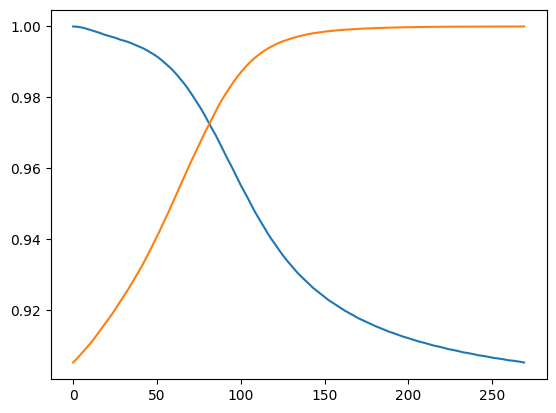

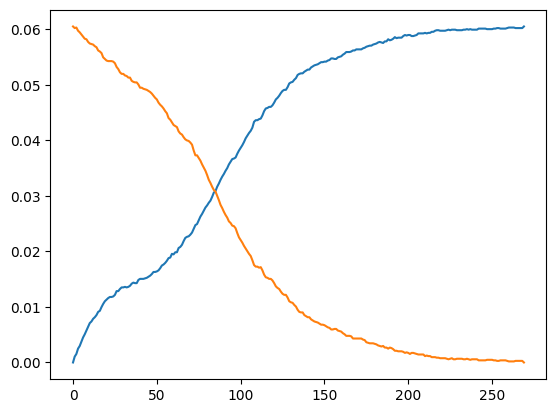

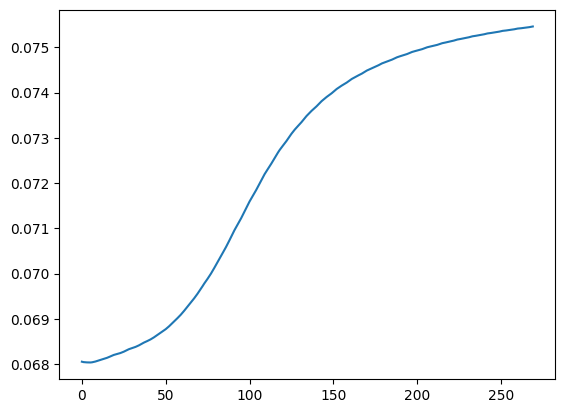

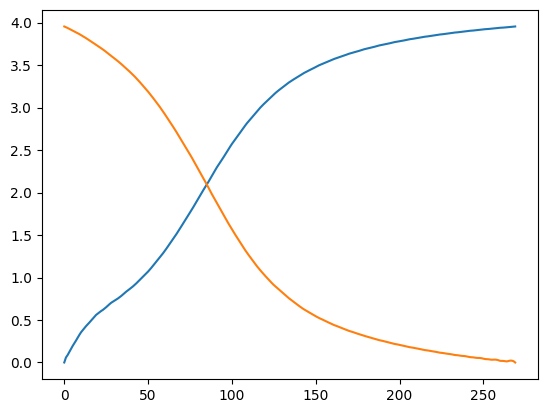

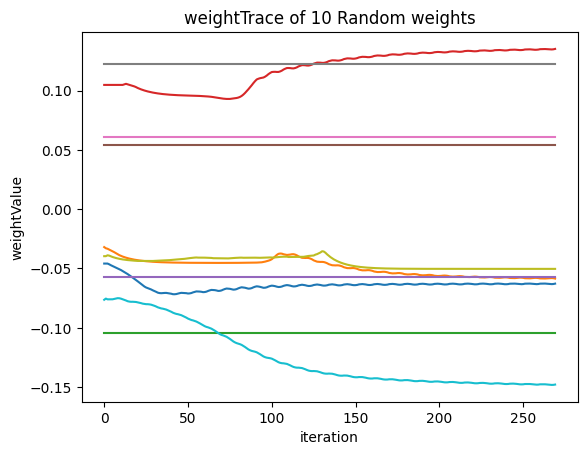

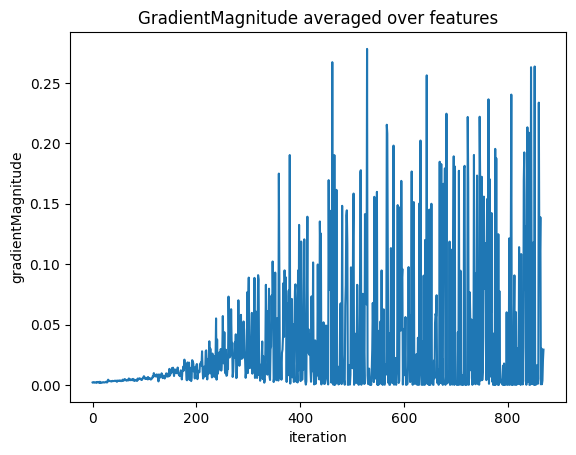

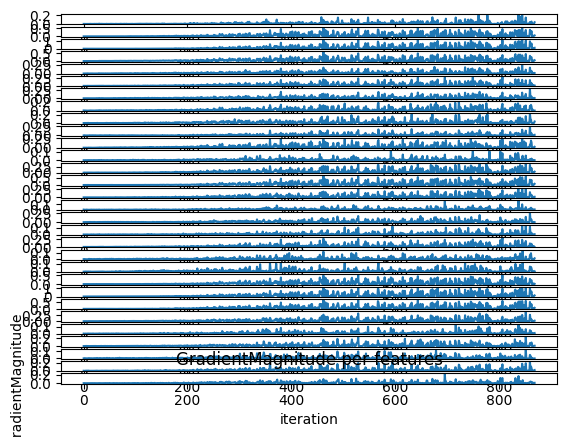

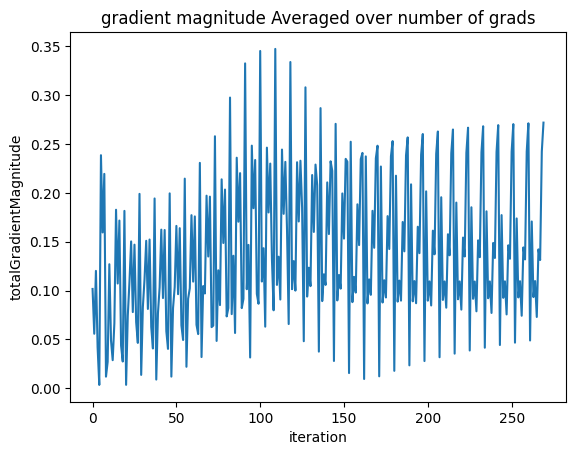

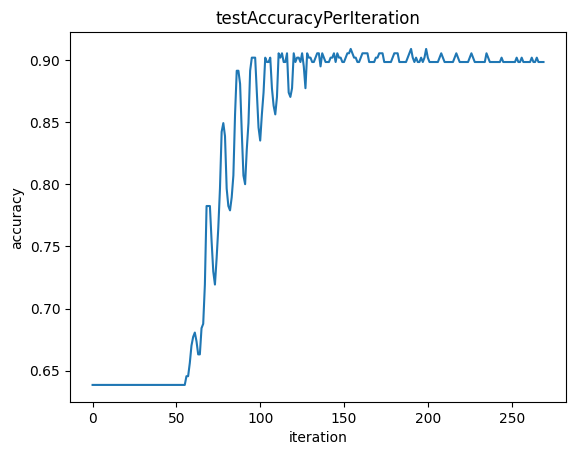

In [ ]:
import utils
if datasetType == "NLP":
    dataPath= dirPath+ "NLP_Results/Trainingresults/"
else:
    dataPath= dirPath+ "Results/Trainingresults/"
utils.appendToNPZ(dataPath+ "data.npz", "Total_gradientsList_iteration", total_gradientsList)
data = utils.loadData(dataPath+ "data.npz")


plotResults.plotTrainingResults(data, dataPath)

In [ ]:
import cega_utils
from datetime import datetime
import numpy as np

datasetType = "numerical"
now = datetime.now()
date_time_string = now.strftime("%Y-%m-%d %H:%M:%S")
# Replace space with underscore
date_time_string = date_time_string.replace(" ", "_")

pathToNPZ =  cega_utils.runCEGA(dirPath, modelsDirPath, model, X_test, device, data,date_time_string, testloader , datasetType)





(30, 29, 30)
numerical


  0%|          | 0/270 [00:00<?, ?it/s]

0


  0%|          | 1/270 [00:00<00:57,  4.71it/s]

1


  1%|          | 2/270 [00:00<00:54,  4.88it/s]

2


  1%|          | 3/270 [00:00<00:54,  4.92it/s]

3


  1%|▏         | 4/270 [00:00<00:58,  4.56it/s]

4


  2%|▏         | 5/270 [00:01<00:56,  4.66it/s]

5


  2%|▏         | 6/270 [00:01<00:56,  4.67it/s]

6


  3%|▎         | 7/270 [00:01<01:00,  4.36it/s]

7


  3%|▎         | 8/270 [00:01<01:02,  4.19it/s]

8


  3%|▎         | 9/270 [00:02<01:00,  4.28it/s]

9


  4%|▎         | 10/270 [00:02<01:00,  4.32it/s]

10


  4%|▍         | 11/270 [00:02<00:59,  4.37it/s]

11


  4%|▍         | 12/270 [00:02<00:58,  4.44it/s]

12


  5%|▍         | 13/270 [00:02<00:57,  4.50it/s]

13


  5%|▌         | 14/270 [00:03<00:56,  4.53it/s]

14


  6%|▌         | 15/270 [00:03<00:55,  4.56it/s]

15


  6%|▌         | 16/270 [00:03<00:55,  4.58it/s]

16


  6%|▋         | 17/270 [00:03<00:54,  4.61it/s]

17


  7%|▋         | 18/270 [00:03<00:54,  4.65it/s]

18


  7%|▋         | 19/270 [00:04<00:53,  4.66it/s]

19


  7%|▋         | 20/270 [00:04<00:53,  4.69it/s]

20


  8%|▊         | 21/270 [00:04<00:53,  4.69it/s]

21


  8%|▊         | 22/270 [00:04<00:52,  4.71it/s]

22


  9%|▊         | 23/270 [00:05<00:51,  4.75it/s]

23


  9%|▉         | 24/270 [00:05<00:51,  4.76it/s]

24


  9%|▉         | 25/270 [00:05<00:51,  4.76it/s]

25


 10%|▉         | 26/270 [00:05<00:51,  4.75it/s]

26


 10%|█         | 27/270 [00:05<00:51,  4.76it/s]

27


 10%|█         | 28/270 [00:06<00:50,  4.78it/s]

28


 11%|█         | 29/270 [00:06<00:50,  4.81it/s]

29


 11%|█         | 30/270 [00:06<00:49,  4.84it/s]

30


 11%|█▏        | 31/270 [00:06<00:52,  4.57it/s]

31


 12%|█▏        | 32/270 [00:06<00:54,  4.37it/s]

32


 12%|█▏        | 33/270 [00:07<00:53,  4.45it/s]

33


 13%|█▎        | 34/270 [00:07<00:51,  4.62it/s]

34


 13%|█▎        | 35/270 [00:07<00:49,  4.77it/s]

35


 13%|█▎        | 36/270 [00:07<00:47,  4.88it/s]

36


 14%|█▎        | 37/270 [00:07<00:47,  4.95it/s]

37


 14%|█▍        | 38/270 [00:08<00:47,  4.93it/s]

38


 14%|█▍        | 39/270 [00:08<00:46,  5.01it/s]

39


 15%|█▍        | 40/270 [00:08<00:45,  5.09it/s]

40


 15%|█▌        | 41/270 [00:08<00:44,  5.16it/s]

41


 16%|█▌        | 42/270 [00:08<00:44,  5.18it/s]

42


 16%|█▌        | 43/270 [00:09<00:44,  5.14it/s]

43


 16%|█▋        | 44/270 [00:09<00:44,  5.11it/s]

44


 17%|█▋        | 45/270 [00:09<00:44,  5.09it/s]

45


 17%|█▋        | 46/270 [00:09<00:43,  5.11it/s]

46


 17%|█▋        | 47/270 [00:09<00:43,  5.10it/s]

47


 18%|█▊        | 48/270 [00:10<00:47,  4.71it/s]

48


 18%|█▊        | 49/270 [00:10<00:46,  4.75it/s]

49


 19%|█▊        | 50/270 [00:10<00:45,  4.83it/s]

50


 19%|█▉        | 51/270 [00:10<00:44,  4.94it/s]

51


 19%|█▉        | 52/270 [00:10<00:43,  5.03it/s]

52


 20%|█▉        | 53/270 [00:11<00:42,  5.06it/s]

53


 20%|██        | 54/270 [00:11<00:43,  4.95it/s]

54


 20%|██        | 55/270 [00:11<00:43,  4.98it/s]

55


 21%|██        | 56/270 [00:11<00:42,  4.99it/s]

56


 21%|██        | 57/270 [00:11<00:42,  4.99it/s]

57


 21%|██▏       | 58/270 [00:12<00:42,  5.02it/s]

58


 22%|██▏       | 59/270 [00:12<00:41,  5.08it/s]

59


 22%|██▏       | 60/270 [00:12<00:41,  5.11it/s]

60


 23%|██▎       | 61/270 [00:12<00:40,  5.10it/s]

61


 23%|██▎       | 62/270 [00:12<00:40,  5.10it/s]

62


 23%|██▎       | 63/270 [00:13<00:40,  5.12it/s]

63


 24%|██▎       | 64/270 [00:13<00:40,  5.09it/s]

64


 24%|██▍       | 65/270 [00:13<00:40,  5.11it/s]

65


 24%|██▍       | 66/270 [00:13<00:40,  5.09it/s]

66


 25%|██▍       | 67/270 [00:13<00:39,  5.08it/s]

67


 25%|██▌       | 68/270 [00:14<00:39,  5.07it/s]

68


 26%|██▌       | 69/270 [00:14<00:39,  5.08it/s]

69


 26%|██▌       | 70/270 [00:14<00:39,  5.08it/s]

70


 26%|██▋       | 71/270 [00:14<00:39,  5.08it/s]

71


 27%|██▋       | 72/270 [00:14<00:39,  4.99it/s]

72


 27%|██▋       | 73/270 [00:15<00:41,  4.74it/s]

73


 27%|██▋       | 74/270 [00:15<00:40,  4.88it/s]

74


 28%|██▊       | 75/270 [00:15<00:39,  4.90it/s]

75


 28%|██▊       | 76/270 [00:15<00:38,  5.03it/s]

76


 29%|██▊       | 77/270 [00:15<00:39,  4.94it/s]

77


 29%|██▉       | 78/270 [00:16<00:38,  4.97it/s]

78


 29%|██▉       | 79/270 [00:16<00:38,  4.92it/s]

79


 30%|██▉       | 80/270 [00:16<00:38,  4.98it/s]

80


 30%|███       | 81/270 [00:16<00:37,  5.05it/s]

81


 30%|███       | 82/270 [00:16<00:36,  5.14it/s]

82


 31%|███       | 83/270 [00:17<00:36,  5.17it/s]

83


 31%|███       | 84/270 [00:17<00:35,  5.21it/s]

84


 31%|███▏      | 85/270 [00:17<00:35,  5.28it/s]

85


 32%|███▏      | 86/270 [00:17<00:34,  5.31it/s]

86


 32%|███▏      | 87/270 [00:17<00:34,  5.32it/s]

87


 33%|███▎      | 88/270 [00:18<00:33,  5.36it/s]

88


 33%|███▎      | 89/270 [00:18<00:33,  5.37it/s]

89


 33%|███▎      | 90/270 [00:18<00:33,  5.37it/s]

90


 34%|███▎      | 91/270 [00:18<00:33,  5.39it/s]

91


 34%|███▍      | 92/270 [00:18<00:33,  5.39it/s]

92


 34%|███▍      | 93/270 [00:18<00:32,  5.39it/s]

93


 35%|███▍      | 94/270 [00:19<00:32,  5.38it/s]

94


 35%|███▌      | 95/270 [00:19<00:32,  5.34it/s]

95


 36%|███▌      | 96/270 [00:19<00:32,  5.31it/s]

96


 36%|███▌      | 97/270 [00:19<00:32,  5.29it/s]

97


 36%|███▋      | 98/270 [00:19<00:32,  5.27it/s]

98


 37%|███▋      | 99/270 [00:20<00:32,  5.31it/s]

99


 37%|███▋      | 100/270 [00:20<00:31,  5.33it/s]

100


 37%|███▋      | 101/270 [00:20<00:31,  5.33it/s]

101


 38%|███▊      | 102/270 [00:20<00:31,  5.37it/s]

102


 38%|███▊      | 103/270 [00:20<00:30,  5.39it/s]

103


 39%|███▊      | 104/270 [00:21<00:30,  5.39it/s]

104


 39%|███▉      | 105/270 [00:21<00:30,  5.39it/s]

105


 39%|███▉      | 106/270 [00:21<00:30,  5.41it/s]

106


 40%|███▉      | 107/270 [00:21<00:30,  5.42it/s]

107


 40%|████      | 108/270 [00:21<00:29,  5.42it/s]

108


 40%|████      | 109/270 [00:21<00:29,  5.43it/s]

109


 41%|████      | 110/270 [00:22<00:29,  5.40it/s]

110


 41%|████      | 111/270 [00:22<00:30,  5.16it/s]

111


 41%|████▏     | 112/270 [00:22<00:30,  5.19it/s]

112


 42%|████▏     | 113/270 [00:22<00:30,  5.23it/s]

113


 42%|████▏     | 114/270 [00:22<00:29,  5.28it/s]

114


 43%|████▎     | 115/270 [00:23<00:29,  5.31it/s]

115


 43%|████▎     | 116/270 [00:23<00:28,  5.33it/s]

116


 43%|████▎     | 117/270 [00:23<00:28,  5.34it/s]

117


 44%|████▎     | 118/270 [00:23<00:28,  5.38it/s]

118


 44%|████▍     | 119/270 [00:23<00:28,  5.30it/s]

119


 44%|████▍     | 120/270 [00:24<00:28,  5.33it/s]

120


 45%|████▍     | 121/270 [00:24<00:27,  5.36it/s]

121


 45%|████▌     | 122/270 [00:24<00:27,  5.38it/s]

122


 46%|████▌     | 123/270 [00:24<00:27,  5.36it/s]

123


 46%|████▌     | 124/270 [00:24<00:27,  5.37it/s]

124


 46%|████▋     | 125/270 [00:24<00:27,  5.36it/s]

125


 47%|████▋     | 126/270 [00:25<00:26,  5.35it/s]

126


 47%|████▋     | 127/270 [00:25<00:27,  5.25it/s]

127


 47%|████▋     | 128/270 [00:25<00:26,  5.28it/s]

128


 48%|████▊     | 129/270 [00:25<00:26,  5.30it/s]

129


 48%|████▊     | 130/270 [00:25<00:26,  5.30it/s]

130


 49%|████▊     | 131/270 [00:26<00:26,  5.32it/s]

131


 49%|████▉     | 132/270 [00:26<00:25,  5.33it/s]

132


 49%|████▉     | 133/270 [00:26<00:26,  5.27it/s]

133


 50%|████▉     | 134/270 [00:26<00:25,  5.30it/s]

134


 50%|█████     | 135/270 [00:26<00:25,  5.33it/s]

135


 50%|█████     | 136/270 [00:27<00:25,  5.35it/s]

136


 51%|█████     | 137/270 [00:27<00:24,  5.34it/s]

137


 51%|█████     | 138/270 [00:27<00:24,  5.31it/s]

138


 51%|█████▏    | 139/270 [00:27<00:24,  5.33it/s]

139


 52%|█████▏    | 140/270 [00:27<00:24,  5.32it/s]

140


 52%|█████▏    | 141/270 [00:27<00:24,  5.37it/s]

141


 53%|█████▎    | 142/270 [00:28<00:23,  5.36it/s]

142


 53%|█████▎    | 143/270 [00:28<00:23,  5.38it/s]

143


 53%|█████▎    | 144/270 [00:28<00:23,  5.36it/s]

144


 54%|█████▎    | 145/270 [00:28<00:24,  5.18it/s]

145


 54%|█████▍    | 146/270 [00:28<00:24,  5.17it/s]

146


 54%|█████▍    | 147/270 [00:29<00:23,  5.17it/s]

147


 55%|█████▍    | 148/270 [00:29<00:23,  5.22it/s]

148


 55%|█████▌    | 149/270 [00:29<00:22,  5.28it/s]

149


 56%|█████▌    | 150/270 [00:29<00:22,  5.33it/s]

150


 56%|█████▌    | 151/270 [00:29<00:22,  5.30it/s]

151


 56%|█████▋    | 152/270 [00:30<00:22,  5.28it/s]

152


 57%|█████▋    | 153/270 [00:30<00:22,  5.30it/s]

153


 57%|█████▋    | 154/270 [00:30<00:21,  5.31it/s]

154


 57%|█████▋    | 155/270 [00:30<00:21,  5.29it/s]

155


 58%|█████▊    | 156/270 [00:30<00:21,  5.25it/s]

156


 58%|█████▊    | 157/270 [00:31<00:21,  5.27it/s]

157


 59%|█████▊    | 158/270 [00:31<00:21,  5.28it/s]

158


 59%|█████▉    | 159/270 [00:31<00:21,  5.18it/s]

159


 59%|█████▉    | 160/270 [00:31<00:20,  5.26it/s]

160


 60%|█████▉    | 161/270 [00:31<00:20,  5.32it/s]

161


 60%|██████    | 162/270 [00:31<00:20,  5.31it/s]

162


 60%|██████    | 163/270 [00:32<00:20,  5.31it/s]

163


 61%|██████    | 164/270 [00:32<00:19,  5.35it/s]

164


 61%|██████    | 165/270 [00:32<00:19,  5.38it/s]

165


 61%|██████▏   | 166/270 [00:32<00:19,  5.28it/s]

166


 62%|██████▏   | 167/270 [00:32<00:19,  5.30it/s]

167


 62%|██████▏   | 168/270 [00:33<00:19,  5.34it/s]

168


 63%|██████▎   | 169/270 [00:33<00:18,  5.36it/s]

169


 63%|██████▎   | 170/270 [00:33<00:18,  5.35it/s]

170


 63%|██████▎   | 171/270 [00:33<00:18,  5.33it/s]

171


 64%|██████▎   | 172/270 [00:33<00:18,  5.36it/s]

172


 64%|██████▍   | 173/270 [00:34<00:17,  5.39it/s]

173


 64%|██████▍   | 174/270 [00:34<00:18,  5.20it/s]

174


 65%|██████▍   | 175/270 [00:34<00:17,  5.28it/s]

175


 65%|██████▌   | 176/270 [00:34<00:17,  5.27it/s]

176


 66%|██████▌   | 177/270 [00:34<00:17,  5.30it/s]

177


 66%|██████▌   | 178/270 [00:34<00:17,  5.35it/s]

178


 66%|██████▋   | 179/270 [00:35<00:16,  5.37it/s]

179


 67%|██████▋   | 180/270 [00:35<00:16,  5.38it/s]

180


 67%|██████▋   | 181/270 [00:35<00:16,  5.24it/s]

181


 67%|██████▋   | 182/270 [00:35<00:16,  5.24it/s]

182


 68%|██████▊   | 183/270 [00:35<00:16,  5.29it/s]

183


 68%|██████▊   | 184/270 [00:36<00:16,  5.30it/s]

184


 69%|██████▊   | 185/270 [00:36<00:15,  5.32it/s]

185


 69%|██████▉   | 186/270 [00:36<00:15,  5.33it/s]

186


 69%|██████▉   | 187/270 [00:36<00:15,  5.30it/s]

187


 70%|██████▉   | 188/270 [00:36<00:15,  5.33it/s]

188


 70%|███████   | 189/270 [00:37<00:15,  5.34it/s]

189


 70%|███████   | 190/270 [00:37<00:14,  5.34it/s]

190


 71%|███████   | 191/270 [00:37<00:14,  5.34it/s]

191


 71%|███████   | 192/270 [00:37<00:14,  5.31it/s]

192


 71%|███████▏  | 193/270 [00:37<00:14,  5.33it/s]

193


 72%|███████▏  | 194/270 [00:37<00:14,  5.34it/s]

194


 72%|███████▏  | 195/270 [00:38<00:14,  5.36it/s]

195


 73%|███████▎  | 196/270 [00:38<00:13,  5.38it/s]

196


 73%|███████▎  | 197/270 [00:38<00:13,  5.41it/s]

197


 73%|███████▎  | 198/270 [00:38<00:13,  5.39it/s]

198


 74%|███████▎  | 199/270 [00:38<00:13,  5.37it/s]

199


 74%|███████▍  | 200/270 [00:39<00:13,  5.36it/s]

200


 74%|███████▍  | 201/270 [00:39<00:12,  5.35it/s]

201


 75%|███████▍  | 202/270 [00:39<00:12,  5.36it/s]

202


 75%|███████▌  | 203/270 [00:39<00:12,  5.18it/s]

203


 76%|███████▌  | 204/270 [00:39<00:12,  5.23it/s]

204


 76%|███████▌  | 205/270 [00:40<00:12,  5.28it/s]

205


 76%|███████▋  | 206/270 [00:40<00:12,  5.27it/s]

206


 77%|███████▋  | 207/270 [00:40<00:11,  5.34it/s]

207


 77%|███████▋  | 208/270 [00:40<00:11,  5.36it/s]

208


 77%|███████▋  | 209/270 [00:40<00:11,  5.36it/s]

209


 78%|███████▊  | 210/270 [00:40<00:11,  5.33it/s]

210


 78%|███████▊  | 211/270 [00:41<00:11,  5.33it/s]

211


 79%|███████▊  | 212/270 [00:41<00:10,  5.34it/s]

212


 79%|███████▉  | 213/270 [00:41<00:10,  5.34it/s]

213


 79%|███████▉  | 214/270 [00:41<00:10,  5.32it/s]

214


 80%|███████▉  | 215/270 [00:41<00:10,  5.34it/s]

215


 80%|████████  | 216/270 [00:42<00:10,  5.35it/s]

216


 80%|████████  | 217/270 [00:42<00:09,  5.33it/s]

217


 81%|████████  | 218/270 [00:42<00:09,  5.32it/s]

218


 81%|████████  | 219/270 [00:42<00:09,  5.32it/s]

219


 81%|████████▏ | 220/270 [00:42<00:09,  5.33it/s]

220


 82%|████████▏ | 221/270 [00:43<00:09,  5.34it/s]

221


 82%|████████▏ | 222/270 [00:43<00:09,  5.32it/s]

222


 83%|████████▎ | 223/270 [00:43<00:08,  5.33it/s]

223


 83%|████████▎ | 224/270 [00:43<00:08,  5.33it/s]

224


 83%|████████▎ | 225/270 [00:43<00:08,  5.35it/s]

225


 84%|████████▎ | 226/270 [00:43<00:08,  5.36it/s]

226


 84%|████████▍ | 227/270 [00:44<00:08,  5.36it/s]

227


 84%|████████▍ | 228/270 [00:44<00:08,  5.22it/s]

228


 85%|████████▍ | 229/270 [00:44<00:07,  5.25it/s]

229


 85%|████████▌ | 230/270 [00:44<00:07,  5.29it/s]

230


 86%|████████▌ | 231/270 [00:44<00:07,  5.32it/s]

231


 86%|████████▌ | 232/270 [00:45<00:07,  5.32it/s]

232


 86%|████████▋ | 233/270 [00:45<00:06,  5.36it/s]

233


 87%|████████▋ | 234/270 [00:45<00:06,  5.37it/s]

234


 87%|████████▋ | 235/270 [00:45<00:06,  5.37it/s]

235


 87%|████████▋ | 236/270 [00:45<00:06,  5.26it/s]

236


 88%|████████▊ | 237/270 [00:46<00:06,  5.23it/s]

237


 88%|████████▊ | 238/270 [00:46<00:06,  5.23it/s]

238


 89%|████████▊ | 239/270 [00:46<00:06,  5.15it/s]

239


 89%|████████▉ | 240/270 [00:46<00:05,  5.13it/s]

240


 89%|████████▉ | 241/270 [00:46<00:05,  5.15it/s]

241


 90%|████████▉ | 242/270 [00:47<00:05,  5.13it/s]

242


 90%|█████████ | 243/270 [00:47<00:05,  5.04it/s]

243


 90%|█████████ | 244/270 [00:47<00:05,  5.00it/s]

244


 91%|█████████ | 245/270 [00:47<00:05,  4.98it/s]

245


 91%|█████████ | 246/270 [00:47<00:04,  4.96it/s]

246


 91%|█████████▏| 247/270 [00:48<00:04,  4.92it/s]

247


 92%|█████████▏| 248/270 [00:48<00:04,  4.91it/s]

248


 92%|█████████▏| 249/270 [00:48<00:04,  4.93it/s]

249


 93%|█████████▎| 250/270 [00:48<00:04,  4.94it/s]

250


 93%|█████████▎| 251/270 [00:48<00:03,  4.92it/s]

251


 93%|█████████▎| 252/270 [00:49<00:03,  4.91it/s]

252


 94%|█████████▎| 253/270 [00:49<00:03,  4.92it/s]

253


 94%|█████████▍| 254/270 [00:49<00:03,  4.75it/s]

254


 94%|█████████▍| 255/270 [00:49<00:03,  4.80it/s]

255


 95%|█████████▍| 256/270 [00:49<00:02,  4.85it/s]

256


 95%|█████████▌| 257/270 [00:50<00:02,  4.86it/s]

257


 96%|█████████▌| 258/270 [00:50<00:02,  4.88it/s]

258


 96%|█████████▌| 259/270 [00:50<00:02,  4.87it/s]

259


 96%|█████████▋| 260/270 [00:50<00:02,  4.88it/s]

260


 97%|█████████▋| 261/270 [00:50<00:01,  4.91it/s]

261


 97%|█████████▋| 262/270 [00:51<00:01,  4.94it/s]

262


 97%|█████████▋| 263/270 [00:51<00:01,  4.99it/s]

263


 98%|█████████▊| 264/270 [00:51<00:01,  5.03it/s]

264


 98%|█████████▊| 265/270 [00:51<00:01,  4.98it/s]

265


 99%|█████████▊| 266/270 [00:51<00:00,  4.96it/s]

266


 99%|█████████▉| 267/270 [00:52<00:00,  4.96it/s]

267


 99%|█████████▉| 268/270 [00:52<00:00,  4.97it/s]

268


100%|█████████▉| 269/270 [00:52<00:00,  5.01it/s]

269


  0%|          | 0/270 [00:00<?, ?it/s]

1378
change precision to accuracy (ONLY NAME)


  0%|          | 1/270 [00:12<56:35, 12.62s/it]

(285, 1378)
27913
0
192
[1.0]
1216
change precision to accuracy (ONLY NAME)


  1%|          | 2/270 [00:24<54:05, 12.11s/it]

(285, 1216)
29501
90
195
[0.9969585346896016]
not Jaccard
1170
change precision to accuracy (ONLY NAME)


  1%|          | 3/270 [00:35<51:08, 11.49s/it]

(285, 1170)
25975
90
195
[0.9965470938039517]
not Jaccard
887
change precision to accuracy (ONLY NAME)


  1%|▏         | 4/270 [00:43<44:38, 10.07s/it]

(285, 887)
17189
0
191
[1.0]
not Jaccard
818
change precision to accuracy (ONLY NAME)


  2%|▏         | 5/270 [00:50<40:22,  9.14s/it]

(285, 818)
20658
0
194
[1.0]
not Jaccard
762
change precision to accuracy (ONLY NAME)


  2%|▏         | 6/270 [00:57<37:42,  8.57s/it]

(285, 762)
19797
0
191
[1.0]
not Jaccard
728
change precision to accuracy (ONLY NAME)


  3%|▎         | 7/270 [01:05<35:26,  8.08s/it]

(285, 728)
18563
0
191
[1.0]
not Jaccard
628
change precision to accuracy (ONLY NAME)


  3%|▎         | 8/270 [01:11<33:02,  7.57s/it]

(285, 628)
15827
0
191
[1.0]
not Jaccard
657
change precision to accuracy (ONLY NAME)


  3%|▎         | 9/270 [01:18<31:49,  7.32s/it]

(285, 657)
15603
0
191
[1.0]
not Jaccard
599
change precision to accuracy (ONLY NAME)


  4%|▎         | 10/270 [01:24<30:37,  7.07s/it]

(285, 599)
20177
0
191
[1.0]
not Jaccard
648
change precision to accuracy (ONLY NAME)


  4%|▍         | 11/270 [01:31<30:29,  7.06s/it]

(285, 648)
21662
93
192
[0.9957251206619168]
not Jaccard
630
change precision to accuracy (ONLY NAME)


  4%|▍         | 12/270 [01:39<30:30,  7.09s/it]

(285, 630)
23586
0
191
[1.0]
not Jaccard
634
change precision to accuracy (ONLY NAME)


  5%|▍         | 13/270 [01:45<29:37,  6.92s/it]

(285, 634)
24083
0
254
[1.0]
not Jaccard
498
change precision to accuracy (ONLY NAME)


  5%|▌         | 14/270 [01:50<27:28,  6.44s/it]

(285, 498)
17287
0
191
[1.0]
not Jaccard
521
change precision to accuracy (ONLY NAME)


  6%|▌         | 15/270 [01:56<26:07,  6.15s/it]

(285, 521)
18859
93
192
[0.9950928661882651]
not Jaccard
504
change precision to accuracy (ONLY NAME)


  6%|▌         | 16/270 [02:01<25:10,  5.95s/it]

(285, 504)
20086
71
214
[0.9964776504440145]
not Jaccard
543
change precision to accuracy (ONLY NAME)


  6%|▋         | 17/270 [02:07<24:25,  5.79s/it]

(285, 543)
17313
90
195
[0.9948284778486468]
not Jaccard
572
change precision to accuracy (ONLY NAME)


  7%|▋         | 18/270 [02:13<24:33,  5.85s/it]

(285, 572)
20846
93
192
[0.9955585271502937]
not Jaccard
527
change precision to accuracy (ONLY NAME)


  7%|▋         | 19/270 [02:18<24:06,  5.76s/it]

(285, 527)
20849
71
214
[0.9966061185468451]
not Jaccard
487
change precision to accuracy (ONLY NAME)


  7%|▋         | 20/270 [02:24<23:34,  5.66s/it]

(285, 487)
17916
92
193
[0.9948911594846734]
not Jaccard
512
change precision to accuracy (ONLY NAME)


  8%|▊         | 21/270 [02:29<22:56,  5.53s/it]

(285, 512)
17860
92
193
[0.9948752228163993]
not Jaccard
442
change precision to accuracy (ONLY NAME)


  8%|▊         | 22/270 [02:34<22:21,  5.41s/it]

(285, 442)
18033
0
197
[1.0]
not Jaccard
472
change precision to accuracy (ONLY NAME)


  9%|▊         | 23/270 [02:39<21:45,  5.29s/it]

(285, 472)
16487
0
197
[1.0]
not Jaccard
401
change precision to accuracy (ONLY NAME)


  9%|▉         | 24/270 [02:44<20:40,  5.04s/it]

(285, 401)
14811
92
193
[0.9938267462926927]
not Jaccard
377
change precision to accuracy (ONLY NAME)


  9%|▉         | 25/270 [02:48<19:38,  4.81s/it]

(285, 377)
13941
92
193
[0.9934440247986888]
not Jaccard
445
change precision to accuracy (ONLY NAME)


 10%|▉         | 26/270 [02:53<19:30,  4.80s/it]

(285, 445)
16733
94
191
[0.9944137398229037]
not Jaccard
433
change precision to accuracy (ONLY NAME)


 10%|█         | 27/270 [02:58<20:02,  4.95s/it]

(285, 433)
16564
0
263
[1.0]
not Jaccard
474
change precision to accuracy (ONLY NAME)


 10%|█         | 28/270 [03:03<20:24,  5.06s/it]

(285, 474)
17747
0
194
[1.0]
not Jaccard
417
change precision to accuracy (ONLY NAME)


 11%|█         | 29/270 [03:08<19:33,  4.87s/it]

(285, 417)
16205
71
214
[0.995637748832637]
not Jaccard
431
change precision to accuracy (ONLY NAME)


 11%|█         | 30/270 [03:13<19:39,  4.91s/it]

(285, 431)
12884
71
214
[0.9945194905441914]
not Jaccard
365
change precision to accuracy (ONLY NAME)


 11%|█▏        | 31/270 [03:17<18:47,  4.72s/it]

(285, 365)
14063
92
193
[0.9935005298481102]
not Jaccard
395
change precision to accuracy (ONLY NAME)


 12%|█▏        | 32/270 [03:21<18:22,  4.63s/it]

(285, 395)
15863
0
194
[1.0]
not Jaccard
302
change precision to accuracy (ONLY NAME)


 12%|█▏        | 33/270 [03:25<17:08,  4.34s/it]

(285, 302)
10274
35
250
[0.996604908332525]
not Jaccard
395
change precision to accuracy (ONLY NAME)


 13%|█▎        | 34/270 [03:29<17:11,  4.37s/it]

(285, 395)
15402
71
214
[0.995411361726879]
not Jaccard
384
change precision to accuracy (ONLY NAME)


 13%|█▎        | 35/270 [03:34<17:05,  4.37s/it]

(285, 384)
16894
94
191
[0.9944666823640217]
not Jaccard
462
change precision to accuracy (ONLY NAME)


 13%|█▎        | 36/270 [03:39<17:39,  4.53s/it]

(285, 462)
19697
0
194
[1.0]
not Jaccard
365
change precision to accuracy (ONLY NAME)


 14%|█▎        | 37/270 [03:43<17:03,  4.39s/it]

(285, 365)
14998
0
194
[1.0]
not Jaccard
354
change precision to accuracy (ONLY NAME)


 14%|█▍        | 38/270 [03:47<16:44,  4.33s/it]

(285, 354)
13792
71
214
[0.9948784534372069]
not Jaccard
398
change precision to accuracy (ONLY NAME)


 14%|█▍        | 39/270 [03:52<17:27,  4.53s/it]

(285, 398)
13609
0
194
[1.0]
not Jaccard
312
change precision to accuracy (ONLY NAME)


 15%|█▍        | 40/270 [03:56<17:06,  4.46s/it]

(285, 312)
11911
58
227
[0.9951541482162253]
not Jaccard
383
change precision to accuracy (ONLY NAME)


 15%|█▌        | 41/270 [04:01<17:05,  4.48s/it]

(285, 383)
14934
0
194
[1.0]
not Jaccard
331
change precision to accuracy (ONLY NAME)


 16%|█▌        | 42/270 [04:05<16:31,  4.35s/it]

(285, 331)
12721
49
236
[0.9961628817541112]
not Jaccard
473
change precision to accuracy (ONLY NAME)


 16%|█▌        | 43/270 [04:10<17:26,  4.61s/it]

(285, 473)
21052
0
194
[1.0]
not Jaccard
309
change precision to accuracy (ONLY NAME)


 16%|█▋        | 44/270 [04:14<16:13,  4.31s/it]

(285, 309)
12970
92
193
[0.9929566681978258]
not Jaccard
430
change precision to accuracy (ONLY NAME)


 17%|█▋        | 45/270 [04:19<17:03,  4.55s/it]

(285, 430)
15518
94
191
[0.9939789905201127]
not Jaccard
244
change precision to accuracy (ONLY NAME)


 17%|█▋        | 46/270 [04:22<15:36,  4.18s/it]

(285, 244)
9719
0
250
[1.0]
not Jaccard
286
change precision to accuracy (ONLY NAME)


 17%|█▋        | 47/270 [04:26<14:57,  4.03s/it]

(285, 286)
11861
0
250
[1.0]
not Jaccard
318
change precision to accuracy (ONLY NAME)


 18%|█▊        | 48/270 [04:30<14:44,  3.98s/it]

(285, 318)
12687
0
194
[1.0]
not Jaccard
374
change precision to accuracy (ONLY NAME)


 18%|█▊        | 49/270 [04:34<14:57,  4.06s/it]

(285, 374)
16334
0
194
[1.0]
not Jaccard
661
change precision to accuracy (ONLY NAME)


 19%|█▊        | 50/270 [04:40<17:35,  4.80s/it]

(285, 661)
25253
0
194
[1.0]
not Jaccard
957
change precision to accuracy (ONLY NAME)


 19%|█▉        | 51/270 [04:49<21:47,  5.97s/it]

(285, 957)
27500
90
195
[0.9967379485320769]
not Jaccard
593
change precision to accuracy (ONLY NAME)


 19%|█▉        | 52/270 [04:55<21:46,  5.99s/it]

(285, 593)
22111
0
197
[1.0]
not Jaccard
243
change precision to accuracy (ONLY NAME)


 20%|█▉        | 53/270 [04:59<18:58,  5.24s/it]

(285, 243)
9185
94
191
[0.9898695980170277]
not Jaccard
268
change precision to accuracy (ONLY NAME)


 20%|██        | 54/270 [05:02<17:20,  4.82s/it]

(285, 268)
10651
0
250
[1.0]
not Jaccard
1004
change precision to accuracy (ONLY NAME)


 20%|██        | 55/270 [05:12<22:08,  6.18s/it]

(285, 1004)
37360
0
197
[1.0]
not Jaccard
364
change precision to accuracy (ONLY NAME)


 21%|██        | 56/270 [05:16<20:19,  5.70s/it]

(285, 364)
15343
51
234
[0.9966870209172405]
not Jaccard
563
change precision to accuracy (ONLY NAME)


 21%|██        | 57/270 [05:22<19:46,  5.57s/it]

(285, 563)
20388
0
197
[1.0]
not Jaccard
849
change precision to accuracy (ONLY NAME)


 21%|██▏       | 58/270 [05:30<22:37,  6.40s/it]

(285, 849)
32405
0
197
[1.0]
not Jaccard
917
change precision to accuracy (ONLY NAME)


 22%|██▏       | 59/270 [05:39<24:47,  7.05s/it]

(285, 917)
26396
2
197
[0.9999242366845973]
not Jaccard
873
change precision to accuracy (ONLY NAME)


 22%|██▏       | 60/270 [05:47<25:42,  7.34s/it]

(285, 873)
30040
3
197
[0.999900143128183]
not Jaccard
1207
change precision to accuracy (ONLY NAME)


 23%|██▎       | 61/270 [05:57<29:11,  8.38s/it]

(285, 1207)
44187
3
191
[0.9999321113374067]
not Jaccard
959
change precision to accuracy (ONLY NAME)


 23%|██▎       | 62/270 [06:06<29:32,  8.52s/it]

(285, 959)
32342
89
193
[0.9972557121272856]
not Jaccard
1057
change precision to accuracy (ONLY NAME)


 23%|██▎       | 63/270 [06:16<30:29,  8.84s/it]

(285, 1057)
31170
3
194
[0.9999037628717159]
not Jaccard
989
change precision to accuracy (ONLY NAME)


 24%|██▎       | 64/270 [06:25<30:50,  8.98s/it]

(285, 989)
41314
3
197
[0.9999273906624392]
not Jaccard
924
change precision to accuracy (ONLY NAME)


 24%|██▍       | 65/270 [06:34<30:16,  8.86s/it]

(285, 924)
34616
3
197
[0.9999133423842399]
not Jaccard
1149
change precision to accuracy (ONLY NAME)


 24%|██▍       | 66/270 [06:44<31:33,  9.28s/it]

(285, 1149)
32065
3
194
[0.9999064487963079]
not Jaccard
1190
change precision to accuracy (ONLY NAME)


 25%|██▍       | 67/270 [06:54<32:38,  9.65s/it]

(285, 1190)
39587
4
194
[0.9998989669369301]
not Jaccard
1162
change precision to accuracy (ONLY NAME)


 25%|██▌       | 68/270 [07:05<33:32,  9.96s/it]

(285, 1162)
45019
7
191
[0.9998445342690889]
not Jaccard
1146
change precision to accuracy (ONLY NAME)


 26%|██▌       | 69/270 [07:16<33:55, 10.13s/it]

(285, 1146)
38167
13
194
[0.9996595075955997]
not Jaccard
1285
change precision to accuracy (ONLY NAME)


 26%|██▌       | 70/270 [07:27<35:03, 10.52s/it]

(285, 1285)
42442
13
194
[0.9996937934283359]
not Jaccard
1064
change precision to accuracy (ONLY NAME)


 26%|██▋       | 71/270 [07:37<34:28, 10.39s/it]

(285, 1064)
37229
10
197
[0.9997314643250356]
not Jaccard
1261
change precision to accuracy (ONLY NAME)


 27%|██▋       | 72/270 [07:48<35:03, 10.62s/it]

(285, 1261)
46175
10
191
[0.9997834794846812]
not Jaccard
1195
change precision to accuracy (ONLY NAME)


 27%|██▋       | 73/270 [07:59<35:09, 10.71s/it]

(285, 1195)
43331
9
194
[0.9997923396400554]
not Jaccard
1293
change precision to accuracy (ONLY NAME)


 27%|██▋       | 74/270 [08:10<35:27, 10.85s/it]

(285, 1293)
51815
7
191
[0.9998649222338003]
not Jaccard
1186
change precision to accuracy (ONLY NAME)


 28%|██▊       | 75/270 [08:21<35:02, 10.78s/it]

(285, 1186)
44085
6
197
[0.9998639178063551]
not Jaccard
1171
change precision to accuracy (ONLY NAME)


 28%|██▊       | 76/270 [08:32<34:50, 10.77s/it]

(285, 1171)
35571
3
238
[0.9999156687468376]
not Jaccard
1246
change precision to accuracy (ONLY NAME)


 29%|██▊       | 77/270 [08:43<35:02, 10.89s/it]

(285, 1246)
44182
6
238
[0.9998642165293745]
not Jaccard
1129
change precision to accuracy (ONLY NAME)


 29%|██▉       | 78/270 [08:53<34:25, 10.76s/it]

(285, 1129)
40847
71
193
[0.998264822327582]
not Jaccard
1350
change precision to accuracy (ONLY NAME)


 29%|██▉       | 79/270 [09:05<35:14, 11.07s/it]

(285, 1350)
44027
71
191
[0.9983899496575809]
not Jaccard
1324
change precision to accuracy (ONLY NAME)


 30%|██▉       | 80/270 [09:17<35:44, 11.29s/it]

(285, 1324)
43570
72
192
[0.998350213097475]
not Jaccard
1173
change precision to accuracy (ONLY NAME)


 30%|███       | 81/270 [09:28<35:14, 11.19s/it]

(285, 1173)
43806
76
195
[0.9982680825851147]
not Jaccard
1179
change precision to accuracy (ONLY NAME)


 30%|███       | 82/270 [09:39<34:27, 11.00s/it]

(285, 1179)
42719
10
197
[0.9997659669077208]
not Jaccard
1184
change precision to accuracy (ONLY NAME)


 31%|███       | 83/270 [09:50<34:28, 11.06s/it]

(285, 1184)
37919
78
195
[0.9979472063583967]
not Jaccard
1174
change precision to accuracy (ONLY NAME)


 31%|███       | 84/270 [10:00<33:50, 10.91s/it]

(285, 1174)
41780
14
191
[0.9996650236876107]
not Jaccard
1007
change precision to accuracy (ONLY NAME)


 31%|███▏      | 85/270 [10:10<32:17, 10.47s/it]

(285, 1007)
35908
13
197
[0.999638094707831]
not Jaccard
1146
change precision to accuracy (ONLY NAME)


 32%|███▏      | 86/270 [10:21<32:47, 10.69s/it]

(285, 1146)
37099
25
191
[0.999326581187372]
not Jaccard
1313
change precision to accuracy (ONLY NAME)


 32%|███▏      | 87/270 [10:33<34:10, 11.20s/it]

(285, 1313)
42951
65
193
[0.9984889343500093]
not Jaccard
1260
change precision to accuracy (ONLY NAME)


 33%|███▎      | 88/270 [10:46<34:50, 11.48s/it]

(285, 1260)
40751
65
191
[0.998407487259898]
not Jaccard
962
change precision to accuracy (ONLY NAME)


 33%|███▎      | 89/270 [10:54<32:02, 10.62s/it]

(285, 962)
36308
20
216
[0.9994494604712618]
not Jaccard
1085
change precision to accuracy (ONLY NAME)


 33%|███▎      | 90/270 [11:04<31:23, 10.47s/it]

(285, 1085)
35921
3
251
[0.9999164903685558]
not Jaccard
1326
change precision to accuracy (ONLY NAME)


 34%|███▎      | 91/270 [11:17<33:12, 11.13s/it]

(285, 1326)
42998
76
193
[0.9982355945582022]
not Jaccard
1147
change precision to accuracy (ONLY NAME)


 34%|███▍      | 92/270 [11:27<32:10, 10.84s/it]

(285, 1147)
38772
78
191
[0.997992277992278]
not Jaccard
1270
change precision to accuracy (ONLY NAME)


 34%|███▍      | 93/270 [11:39<32:53, 11.15s/it]

(285, 1270)
44979
19
194
[0.9995777590115116]
not Jaccard
1195
change precision to accuracy (ONLY NAME)


 35%|███▍      | 94/270 [11:50<32:41, 11.15s/it]

(285, 1195)
37906
19
216
[0.9994990112063282]
not Jaccard
1274
change precision to accuracy (ONLY NAME)


 35%|███▌      | 95/270 [12:02<32:51, 11.26s/it]

(285, 1274)
39249
27
191
[0.9993125572868927]
not Jaccard
1182
change precision to accuracy (ONLY NAME)


 36%|███▌      | 96/270 [12:13<32:30, 11.21s/it]

(285, 1182)
39550
61
193
[0.9984600237307818]
not Jaccard
1219
change precision to accuracy (ONLY NAME)


 36%|███▌      | 97/270 [12:23<31:42, 11.00s/it]

(285, 1219)
39086
7
250
[0.9998209398101962]
not Jaccard
1167
change precision to accuracy (ONLY NAME)


 36%|███▋      | 98/270 [12:34<31:25, 10.96s/it]

(285, 1167)
35395
28
250
[0.9992095531152076]
not Jaccard
1226
change precision to accuracy (ONLY NAME)


 37%|███▋      | 99/270 [12:45<30:49, 10.82s/it]

(285, 1226)
38874
7
234
[0.9998199634783056]
not Jaccard
1206
change precision to accuracy (ONLY NAME)


 37%|███▋      | 100/270 [12:56<31:05, 10.98s/it]

(285, 1206)
39103
4
250
[0.9998977165213389]
not Jaccard
1312
change precision to accuracy (ONLY NAME)


 37%|███▋      | 101/270 [13:08<31:33, 11.20s/it]

(285, 1312)
44818
17
216
[0.9996208319393332]
not Jaccard
1246
change precision to accuracy (ONLY NAME)


 38%|███▊      | 102/270 [13:19<31:19, 11.19s/it]

(285, 1246)
35790
6
234
[0.999832383506537]
not Jaccard
1051
change precision to accuracy (ONLY NAME)


 38%|███▊      | 103/270 [13:30<30:48, 11.07s/it]

(285, 1051)
36665
22
197
[0.9994003325428626]
not Jaccard
1217
change precision to accuracy (ONLY NAME)


 39%|███▊      | 104/270 [13:41<30:31, 11.03s/it]

(285, 1217)
40334
53
214
[0.9986876965360141]
not Jaccard
1209
change precision to accuracy (ONLY NAME)


 39%|███▉      | 105/270 [13:52<30:45, 11.18s/it]

(285, 1209)
36270
29
194
[0.999201079919557]
not Jaccard
1325
change precision to accuracy (ONLY NAME)


 39%|███▉      | 106/270 [14:04<31:25, 11.50s/it]

(285, 1325)
41473
42
234
[0.9989883174756112]
not Jaccard
1200
change precision to accuracy (ONLY NAME)


 40%|███▉      | 107/270 [14:16<31:14, 11.50s/it]

(285, 1200)
39089
62
192
[0.9984163878317285]
not Jaccard
1257
change precision to accuracy (ONLY NAME)


 40%|████      | 108/270 [14:28<31:25, 11.64s/it]

(285, 1257)
38809
6
250
[0.9998454205848255]
not Jaccard
1151
change precision to accuracy (ONLY NAME)


 40%|████      | 109/270 [14:38<30:26, 11.34s/it]

(285, 1151)
39841
7
234
[0.9998243324633608]
not Jaccard
1266
change precision to accuracy (ONLY NAME)


 41%|████      | 110/270 [14:49<29:58, 11.24s/it]

(285, 1266)
38056
58
203
[0.9984782494621399]
not Jaccard
1109
change precision to accuracy (ONLY NAME)


 41%|████      | 111/270 [14:59<28:49, 10.88s/it]

(285, 1109)
34822
24
194
[0.99931125523733]
not Jaccard
1307
change precision to accuracy (ONLY NAME)


 41%|████▏     | 112/270 [15:11<29:02, 11.03s/it]

(285, 1307)
39602
65
191
[0.9983613583079134]
not Jaccard
1205
change precision to accuracy (ONLY NAME)


 42%|████▏     | 113/270 [15:21<28:11, 10.77s/it]

(285, 1205)
37242
7
250
[0.9998120754919595]
not Jaccard
1250
change precision to accuracy (ONLY NAME)


 42%|████▏     | 114/270 [15:32<28:09, 10.83s/it]

(285, 1250)
40801
22
216
[0.9994610881120937]
not Jaccard
1263
change precision to accuracy (ONLY NAME)


 43%|████▎     | 115/270 [15:43<28:16, 10.94s/it]

(285, 1263)
37631
22
216
[0.9994157172071283]
not Jaccard
1129
change precision to accuracy (ONLY NAME)


 43%|████▎     | 116/270 [15:53<27:10, 10.59s/it]

(285, 1129)
35339
7
250
[0.9998019577887173]
not Jaccard
1062
change precision to accuracy (ONLY NAME)


 43%|████▎     | 117/270 [16:03<26:23, 10.35s/it]

(285, 1062)
35239
65
191
[0.9981588488556538]
not Jaccard
1292
change precision to accuracy (ONLY NAME)


 44%|████▎     | 118/270 [16:14<27:16, 10.76s/it]

(285, 1292)
45549
67
192
[0.9985312171168012]
not Jaccard
1376
change precision to accuracy (ONLY NAME)


 44%|████▍     | 119/270 [16:26<27:44, 11.03s/it]

(285, 1376)
45593
5
250
[0.99989034606781]
not Jaccard
1264
change precision to accuracy (ONLY NAME)


 44%|████▍     | 120/270 [16:39<28:38, 11.46s/it]

(285, 1264)
43319
26
191
[0.9994001614949821]
not Jaccard
1202
change precision to accuracy (ONLY NAME)


 45%|████▍     | 121/270 [16:51<28:49, 11.61s/it]

(285, 1202)
37039
63
193
[0.9983019783300091]
not Jaccard
1236
change precision to accuracy (ONLY NAME)


 45%|████▌     | 122/270 [17:02<28:16, 11.46s/it]

(285, 1236)
39836
62
191
[0.9984460373953582]
not Jaccard
1244
change precision to accuracy (ONLY NAME)


 46%|████▌     | 123/270 [17:13<27:49, 11.36s/it]

(285, 1244)
35053
22
216
[0.9993727726300784]
not Jaccard
1319
change precision to accuracy (ONLY NAME)


 46%|████▌     | 124/270 [17:26<28:39, 11.78s/it]

(285, 1319)
39629
9
250
[0.9997729451536405]
not Jaccard
1188
change precision to accuracy (ONLY NAME)


 46%|████▋     | 125/270 [17:37<28:17, 11.70s/it]

(285, 1188)
34993
42
234
[0.9988011988011988]
not Jaccard
1117
change precision to accuracy (ONLY NAME)


 47%|████▋     | 126/270 [17:48<27:45, 11.57s/it]

(285, 1117)
38449
29
191
[0.9992463225739383]
not Jaccard
1215
change precision to accuracy (ONLY NAME)


 47%|████▋     | 127/270 [18:00<27:53, 11.70s/it]

(285, 1215)
39721
28
191
[0.9992955797630129]
not Jaccard
1267
change precision to accuracy (ONLY NAME)


 47%|████▋     | 128/270 [18:12<27:28, 11.61s/it]

(285, 1267)
39168
67
191
[0.9982923410220467]
not Jaccard
1078
change precision to accuracy (ONLY NAME)


 48%|████▊     | 129/270 [18:22<26:32, 11.29s/it]

(285, 1078)
31529
53
203
[0.998321828889874]
not Jaccard
1119
change precision to accuracy (ONLY NAME)


 48%|████▊     | 130/270 [18:32<25:35, 10.97s/it]

(285, 1119)
38099
63
191
[0.9983491431266706]
not Jaccard
1106
change precision to accuracy (ONLY NAME)


 49%|████▊     | 131/270 [18:43<25:20, 10.94s/it]

(285, 1106)
34080
9
234
[0.999735985215172]
not Jaccard
1261
change precision to accuracy (ONLY NAME)


 49%|████▉     | 132/270 [18:55<25:45, 11.20s/it]

(285, 1261)
38737
32
191
[0.9991745982614976]
not Jaccard
1215
change precision to accuracy (ONLY NAME)


 49%|████▉     | 133/270 [19:07<25:42, 11.26s/it]

(285, 1215)
38710
59
195
[0.9984781655446362]
not Jaccard
1194
change precision to accuracy (ONLY NAME)


 50%|████▉     | 134/270 [19:18<25:36, 11.30s/it]

(285, 1194)
37089
8
250
[0.9997843491387444]
not Jaccard
1184
change precision to accuracy (ONLY NAME)


 50%|█████     | 135/270 [19:29<25:08, 11.18s/it]

(285, 1184)
37579
7
250
[0.9998137604427181]
not Jaccard
1255
change precision to accuracy (ONLY NAME)


 50%|█████     | 136/270 [19:40<25:16, 11.32s/it]

(285, 1255)
38880
64
191
[0.9983566146261298]
not Jaccard
1192
change precision to accuracy (ONLY NAME)


 51%|█████     | 137/270 [19:52<25:04, 11.32s/it]

(285, 1192)
38801
64
193
[0.9983532741541232]
not Jaccard
1295
change precision to accuracy (ONLY NAME)


 51%|█████     | 138/270 [20:05<26:17, 11.95s/it]

(285, 1295)
37562
7
250
[0.999813676169182]
not Jaccard
1209
change precision to accuracy (ONLY NAME)


 51%|█████▏    | 139/270 [20:18<26:18, 12.05s/it]

(285, 1209)
38161
29
194
[0.9992406389107096]
not Jaccard
1303
change precision to accuracy (ONLY NAME)


 52%|█████▏    | 140/270 [20:31<26:43, 12.34s/it]

(285, 1303)
37395
62
191
[0.9983447686680728]
not Jaccard
1186
change precision to accuracy (ONLY NAME)


 52%|█████▏    | 141/270 [20:42<25:49, 12.01s/it]

(285, 1186)
37505
59
197
[0.9984293472473645]
not Jaccard
1326
change precision to accuracy (ONLY NAME)


 53%|█████▎    | 142/270 [20:55<26:12, 12.29s/it]

(285, 1326)
40802
60
193
[0.9985316430913808]
not Jaccard
1172
change precision to accuracy (ONLY NAME)


 53%|█████▎    | 143/270 [21:07<25:48, 12.20s/it]

(285, 1172)
39243
62
191
[0.9984225925454777]
not Jaccard
1216
change precision to accuracy (ONLY NAME)


 53%|█████▎    | 144/270 [21:18<25:18, 12.05s/it]

(285, 1216)
39437
7
250
[0.9998225332116418]
not Jaccard
1129
change precision to accuracy (ONLY NAME)


 54%|█████▎    | 145/270 [21:29<24:30, 11.76s/it]

(285, 1129)
32758
22
216
[0.9993288590604027]
not Jaccard
1183
change precision to accuracy (ONLY NAME)


 54%|█████▍    | 146/270 [21:41<23:51, 11.54s/it]

(285, 1183)
40058
65
191
[0.9983799815567131]
not Jaccard
1134
change precision to accuracy (ONLY NAME)


 54%|█████▍    | 147/270 [21:52<23:29, 11.46s/it]

(285, 1134)
36892
64
191
[0.9982682108453296]
not Jaccard
1051
change precision to accuracy (ONLY NAME)


 55%|█████▍    | 148/270 [22:03<22:54, 11.27s/it]

(285, 1051)
33856
47
216
[0.9986136920036575]
not Jaccard
1174
change precision to accuracy (ONLY NAME)


 55%|█████▌    | 149/270 [22:14<23:04, 11.44s/it]

(285, 1174)
36272
42
234
[0.9988434212700336]
not Jaccard
1168
change precision to accuracy (ONLY NAME)


 56%|█████▌    | 150/270 [22:27<23:37, 11.81s/it]

(285, 1168)
34882
47
216
[0.9986544132382834]
not Jaccard
1220
change precision to accuracy (ONLY NAME)


 56%|█████▌    | 151/270 [22:39<23:20, 11.77s/it]

(285, 1220)
39645
29
197
[0.9992690426979886]
not Jaccard
1123
change precision to accuracy (ONLY NAME)


 56%|█████▋    | 152/270 [22:50<23:01, 11.71s/it]

(285, 1123)
35603
27
250
[0.9992422116194218]
not Jaccard
1349
change precision to accuracy (ONLY NAME)


 57%|█████▋    | 153/270 [23:03<23:17, 11.95s/it]

(285, 1349)
43105
7
250
[0.9998376322137688]
not Jaccard
1191
change precision to accuracy (ONLY NAME)


 57%|█████▋    | 154/270 [23:15<23:08, 11.97s/it]

(285, 1191)
39190
25
197
[0.9993624888435547]
not Jaccard
1257
change precision to accuracy (ONLY NAME)


 57%|█████▋    | 155/270 [23:27<23:15, 12.13s/it]

(285, 1257)
38217
7
250
[0.9998168689828381]
not Jaccard
1133
change precision to accuracy (ONLY NAME)


 58%|█████▊    | 156/270 [23:39<22:34, 11.88s/it]

(285, 1133)
38410
7
250
[0.9998177889996616]
not Jaccard
1172
change precision to accuracy (ONLY NAME)


 58%|█████▊    | 157/270 [23:51<22:29, 11.94s/it]

(285, 1172)
35448
34
238
[0.99904176765684]
not Jaccard
1206
change precision to accuracy (ONLY NAME)


 59%|█████▊    | 158/270 [24:03<22:20, 11.97s/it]

(285, 1206)
37009
62
191
[0.9983275336516414]
not Jaccard
1313
change precision to accuracy (ONLY NAME)


 59%|█████▉    | 159/270 [24:15<22:15, 12.03s/it]

(285, 1313)
37544
39
227
[0.99896229678312]
not Jaccard
1259
change precision to accuracy (ONLY NAME)


 59%|█████▉    | 160/270 [24:28<22:21, 12.20s/it]

(285, 1259)
37451
59
193
[0.9984270861103706]
not Jaccard
1207
change precision to accuracy (ONLY NAME)


 60%|█████▉    | 161/270 [24:39<21:56, 12.08s/it]

(285, 1207)
37989
53
214
[0.9986068030072026]
not Jaccard
1136
change precision to accuracy (ONLY NAME)


 60%|██████    | 162/270 [24:52<21:54, 12.18s/it]

(285, 1136)
39020
7
250
[0.999820636994901]
not Jaccard
1123
change precision to accuracy (ONLY NAME)


 60%|██████    | 163/270 [25:03<21:03, 11.81s/it]

(285, 1123)
33211
33
244
[0.9990073396703164]
not Jaccard
1170
change precision to accuracy (ONLY NAME)


 61%|██████    | 164/270 [25:15<21:00, 11.89s/it]

(285, 1170)
40885
6
250
[0.9998532684453791]
not Jaccard
1305
change precision to accuracy (ONLY NAME)


 61%|██████    | 165/270 [25:28<21:39, 12.38s/it]

(285, 1305)
41988
62
193
[0.9985255648038049]
not Jaccard
1297
change precision to accuracy (ONLY NAME)


 61%|██████▏   | 166/270 [25:42<22:06, 12.76s/it]

(285, 1297)
40179
22
216
[0.9994527499315937]
not Jaccard
1248
change precision to accuracy (ONLY NAME)


 62%|██████▏   | 167/270 [25:54<21:43, 12.66s/it]

(285, 1248)
37388
60
193
[0.9983977782525102]
not Jaccard
1242
change precision to accuracy (ONLY NAME)


 62%|██████▏   | 168/270 [26:08<22:07, 13.02s/it]

(285, 1242)
38258
61
191
[0.9984081004201572]
not Jaccard
1204
change precision to accuracy (ONLY NAME)


 63%|██████▎   | 169/270 [26:20<21:31, 12.78s/it]

(285, 1204)
34178
50
214
[0.9985392076662382]
not Jaccard
1272
change precision to accuracy (ONLY NAME)


 63%|██████▎   | 170/270 [26:35<21:56, 13.17s/it]

(285, 1272)
38861
60
193
[0.9984584157652681]
not Jaccard
1315
change precision to accuracy (ONLY NAME)


 63%|██████▎   | 171/270 [26:48<22:03, 13.37s/it]

(285, 1315)
39235
62
192
[0.9984222714202102]
not Jaccard
1115
change precision to accuracy (ONLY NAME)


 64%|██████▎   | 172/270 [27:00<20:56, 12.82s/it]

(285, 1115)
32584
30
191
[0.9990801496289937]
not Jaccard
1330
change precision to accuracy (ONLY NAME)


 64%|██████▍   | 173/270 [27:19<23:34, 14.58s/it]

(285, 1330)
39013
64
191
[0.9983622079484096]
not Jaccard
1215
change precision to accuracy (ONLY NAME)


 64%|██████▍   | 174/270 [27:31<22:19, 13.96s/it]

(285, 1215)
36857
62
193
[0.9983206479048728]
not Jaccard
1209
change precision to accuracy (ONLY NAME)


 65%|██████▍   | 175/270 [27:49<24:05, 15.21s/it]

(285, 1209)
36041
61
193
[0.9983103429172899]
not Jaccard
1269
change precision to accuracy (ONLY NAME)


 65%|██████▌   | 176/270 [28:02<22:30, 14.37s/it]

(285, 1269)
39427
22
216
[0.9994423179294786]
not Jaccard
1272
change precision to accuracy (ONLY NAME)


 66%|██████▌   | 177/270 [28:14<21:10, 13.66s/it]

(285, 1272)
39315
61
191
[0.9984508329947176]
not Jaccard
1182
change precision to accuracy (ONLY NAME)


 66%|██████▌   | 178/270 [28:25<19:49, 12.93s/it]

(285, 1182)
34417
59
193
[0.9982886645782574]
not Jaccard
1178
change precision to accuracy (ONLY NAME)


 66%|██████▋   | 179/270 [28:37<19:10, 12.65s/it]

(285, 1178)
36383
22
216
[0.9993956874055762]
not Jaccard
1229
change precision to accuracy (ONLY NAME)


 67%|██████▋   | 180/270 [28:49<18:56, 12.63s/it]

(285, 1229)
36703
34
238
[0.999074502545118]
not Jaccard
1169
change precision to accuracy (ONLY NAME)


 67%|██████▋   | 181/270 [29:01<18:25, 12.42s/it]

(285, 1169)
37007
30
191
[0.9991899991899992]
not Jaccard
1222
change precision to accuracy (ONLY NAME)


 67%|██████▋   | 182/270 [29:14<18:06, 12.35s/it]

(285, 1222)
39071
7
250
[0.9998208710783562]
not Jaccard
1208
change precision to accuracy (ONLY NAME)


 68%|██████▊   | 183/270 [29:26<17:50, 12.30s/it]

(285, 1208)
36753
6
250
[0.9998367746674284]
not Jaccard
1147
change precision to accuracy (ONLY NAME)


 68%|██████▊   | 184/270 [29:37<17:09, 11.97s/it]

(285, 1147)
35846
8
244
[0.9997768728733196]
not Jaccard
1156
change precision to accuracy (ONLY NAME)


 69%|██████▊   | 185/270 [29:48<16:36, 11.73s/it]

(285, 1156)
34770
52
214
[0.9985066911722474]
not Jaccard
1183
change precision to accuracy (ONLY NAME)


 69%|██████▉   | 186/270 [30:00<16:33, 11.83s/it]

(285, 1183)
35067
60
191
[0.9982919122042873]
not Jaccard
1171
change precision to accuracy (ONLY NAME)


 69%|██████▉   | 187/270 [30:11<16:06, 11.65s/it]

(285, 1171)
37545
9
250
[0.9997603451030516]
not Jaccard
1169
change precision to accuracy (ONLY NAME)


 70%|██████▉   | 188/270 [30:23<15:47, 11.55s/it]

(285, 1169)
34062
60
193
[0.9982416036574644]
not Jaccard
1145
change precision to accuracy (ONLY NAME)


 70%|███████   | 189/270 [30:34<15:19, 11.35s/it]

(285, 1145)
35689
63
191
[0.9982378608189751]
not Jaccard
1148
change precision to accuracy (ONLY NAME)


 70%|███████   | 190/270 [30:46<15:24, 11.55s/it]

(285, 1148)
32007
9
234
[0.9997188905547226]
not Jaccard
1196
change precision to accuracy (ONLY NAME)


 71%|███████   | 191/270 [30:57<15:13, 11.57s/it]

(285, 1196)
37711
53
214
[0.9985965469759559]
not Jaccard
1132
change precision to accuracy (ONLY NAME)


 71%|███████   | 192/270 [31:09<15:07, 11.63s/it]

(285, 1132)
36670
42
234
[0.9988559599041186]
not Jaccard
1218
change precision to accuracy (ONLY NAME)


 71%|███████▏  | 193/270 [31:21<14:56, 11.64s/it]

(285, 1218)
36647
61
193
[0.9983382368965893]
not Jaccard
1322
change precision to accuracy (ONLY NAME)


 72%|███████▏  | 194/270 [31:33<14:58, 11.82s/it]

(285, 1322)
40371
9
250
[0.999777117384844]
not Jaccard
1061
change precision to accuracy (ONLY NAME)


 72%|███████▏  | 195/270 [31:43<14:13, 11.38s/it]

(285, 1061)
29857
32
195
[0.9989293720097695]
not Jaccard
1275
change precision to accuracy (ONLY NAME)


 73%|███████▎  | 196/270 [31:56<14:34, 11.81s/it]

(285, 1275)
36118
9
250
[0.9997508788440779]
not Jaccard
1299
change precision to accuracy (ONLY NAME)


 73%|███████▎  | 197/270 [32:08<14:27, 11.89s/it]

(285, 1299)
38421
31
195
[0.9991938000624154]
not Jaccard
1281
change precision to accuracy (ONLY NAME)


 73%|███████▎  | 198/270 [32:20<14:16, 11.89s/it]

(285, 1281)
39624
62
192
[0.9984377362294008]
not Jaccard
1216
change precision to accuracy (ONLY NAME)


 74%|███████▎  | 199/270 [32:32<14:01, 11.85s/it]

(285, 1216)
36856
62
191
[0.9983206024161656]
not Jaccard
1132
change precision to accuracy (ONLY NAME)


 74%|███████▍  | 200/270 [32:43<13:33, 11.62s/it]

(285, 1132)
37573
30
203
[0.9992021913145228]
not Jaccard
1183
change precision to accuracy (ONLY NAME)


 74%|███████▍  | 201/270 [32:55<13:36, 11.83s/it]

(285, 1183)
33459
34
238
[0.9989848625085839]
not Jaccard
1178
change precision to accuracy (ONLY NAME)


 75%|███████▍  | 202/270 [33:07<13:16, 11.71s/it]

(285, 1178)
39027
29
194
[0.9992574764440803]
not Jaccard
1153
change precision to accuracy (ONLY NAME)


 75%|███████▌  | 203/270 [33:18<12:59, 11.63s/it]

(285, 1153)
36207
9
250
[0.9997514910536779]
not Jaccard
1180
change precision to accuracy (ONLY NAME)


 76%|███████▌  | 204/270 [33:30<13:00, 11.82s/it]

(285, 1180)
38160
58
195
[0.9984823904966246]
not Jaccard
1204
change precision to accuracy (ONLY NAME)


 76%|███████▌  | 205/270 [33:42<12:42, 11.73s/it]

(285, 1204)
38441
60
191
[0.9984415989195086]
not Jaccard
1162
change precision to accuracy (ONLY NAME)


 76%|███████▋  | 206/270 [33:53<12:28, 11.69s/it]

(285, 1162)
36770
61
192
[0.9983437864842116]
not Jaccard
1178
change precision to accuracy (ONLY NAME)


 77%|███████▋  | 207/270 [34:06<12:26, 11.85s/it]

(285, 1178)
36654
61
193
[0.9983385537246358]
not Jaccard
1150
change precision to accuracy (ONLY NAME)


 77%|███████▋  | 208/270 [34:17<12:08, 11.76s/it]

(285, 1150)
37025
22
216
[0.9994061597430292]
not Jaccard
1262
change precision to accuracy (ONLY NAME)


 77%|███████▋  | 209/270 [34:29<12:03, 11.86s/it]

(285, 1262)
36867
7
250
[0.9998101643434398]
not Jaccard
1256
change precision to accuracy (ONLY NAME)


 78%|███████▊  | 210/270 [34:41<11:55, 11.93s/it]

(285, 1256)
35015
34
238
[0.9990299295272334]
not Jaccard
1167
change precision to accuracy (ONLY NAME)


 78%|███████▊  | 211/270 [34:54<11:50, 12.04s/it]

(285, 1167)
38452
29
194
[0.9992463813310465]
not Jaccard
1367
change precision to accuracy (ONLY NAME)


 79%|███████▊  | 212/270 [35:07<11:59, 12.41s/it]

(285, 1367)
41879
32
191
[0.9992364772971296]
not Jaccard
1063
change precision to accuracy (ONLY NAME)


 79%|███████▉  | 213/270 [35:18<11:20, 11.94s/it]

(285, 1063)
34505
19
238
[0.9994496582087823]
not Jaccard
1204
change precision to accuracy (ONLY NAME)


 79%|███████▉  | 214/270 [35:29<11:03, 11.85s/it]

(285, 1204)
34811
10
250
[0.9997128169782602]
not Jaccard
1257
change precision to accuracy (ONLY NAME)


 80%|███████▉  | 215/270 [35:42<10:55, 11.92s/it]

(285, 1257)
35839
50
214
[0.9986068154587757]
not Jaccard
1056
change precision to accuracy (ONLY NAME)


 80%|████████  | 216/270 [35:52<10:24, 11.57s/it]

(285, 1056)
33601
62
191
[0.998158215251166]
not Jaccard
1265
change precision to accuracy (ONLY NAME)


 80%|████████  | 217/270 [36:04<10:22, 11.75s/it]

(285, 1265)
39489
29
250
[0.99926615719419]
not Jaccard
1168
change precision to accuracy (ONLY NAME)


 81%|████████  | 218/270 [36:17<10:17, 11.87s/it]

(285, 1168)
38893
30
191
[0.9992292474886314]
not Jaccard
1125
change precision to accuracy (ONLY NAME)


 81%|████████  | 219/270 [36:28<09:55, 11.68s/it]

(285, 1125)
37421
7
250
[0.9998129742438816]
not Jaccard
1269
change precision to accuracy (ONLY NAME)


 81%|████████▏ | 220/270 [36:40<09:52, 11.85s/it]

(285, 1269)
38169
42
234
[0.9989008400722305]
not Jaccard
1296
change precision to accuracy (ONLY NAME)


 82%|████████▏ | 221/270 [36:53<09:49, 12.03s/it]

(285, 1296)
40283
34
226
[0.9991566832849667]
not Jaccard
1146
change precision to accuracy (ONLY NAME)


 82%|████████▏ | 222/270 [37:05<09:41, 12.11s/it]

(285, 1146)
34897
9
250
[0.9997421646708302]
not Jaccard
1232
change precision to accuracy (ONLY NAME)


 83%|████████▎ | 223/270 [37:17<09:36, 12.26s/it]

(285, 1232)
37333
58
195
[0.998448824583456]
not Jaccard
1143
change precision to accuracy (ONLY NAME)


 83%|████████▎ | 224/270 [37:28<09:05, 11.86s/it]

(285, 1143)
35626
60
193
[0.9983186683853612]
not Jaccard
1184
change precision to accuracy (ONLY NAME)


 83%|████████▎ | 225/270 [37:40<08:50, 11.79s/it]

(285, 1184)
36483
8
244
[0.9997807678605684]
not Jaccard
1041
change precision to accuracy (ONLY NAME)


 84%|████████▎ | 226/270 [37:51<08:22, 11.41s/it]

(285, 1041)
30614
63
191
[0.9979463441666395]
not Jaccard
1117
change precision to accuracy (ONLY NAME)


 84%|████████▍ | 227/270 [38:02<08:06, 11.33s/it]

(285, 1117)
37469
22
216
[0.9994131924995332]
not Jaccard
1095
change precision to accuracy (ONLY NAME)


 84%|████████▍ | 228/270 [38:13<07:54, 11.29s/it]

(285, 1095)
35506
32
203
[0.9990995554054815]
not Jaccard
1215
change precision to accuracy (ONLY NAME)


 85%|████████▍ | 229/270 [38:25<07:53, 11.54s/it]

(285, 1215)
38260
53
214
[0.9986166575313862]
not Jaccard
1176
change precision to accuracy (ONLY NAME)


 85%|████████▌ | 230/270 [38:37<07:41, 11.53s/it]

(285, 1176)
35293
61
192
[0.9982745941053346]
not Jaccard
1222
change precision to accuracy (ONLY NAME)


 86%|████████▌ | 231/270 [38:49<07:44, 11.90s/it]

(285, 1222)
36965
31
194
[0.9991620715753055]
not Jaccard
1211
change precision to accuracy (ONLY NAME)


 86%|████████▌ | 232/270 [39:01<07:33, 11.93s/it]

(285, 1211)
37040
59
193
[0.998409660637753]
not Jaccard
1187
change precision to accuracy (ONLY NAME)


 86%|████████▋ | 233/270 [39:13<07:18, 11.86s/it]

(285, 1187)
38044
8
250
[0.9997897613791653]
not Jaccard
1155
change precision to accuracy (ONLY NAME)


 87%|████████▋ | 234/270 [39:24<07:03, 11.75s/it]

(285, 1155)
35029
62
191
[0.9982331651990539]
not Jaccard
1189
change precision to accuracy (ONLY NAME)


 87%|████████▋ | 235/270 [39:36<06:47, 11.65s/it]

(285, 1189)
37010
29
194
[0.9992170414968007]
not Jaccard
1151
change precision to accuracy (ONLY NAME)


 87%|████████▋ | 236/270 [39:48<06:38, 11.71s/it]

(285, 1151)
39600
26
197
[0.9993438651390502]
not Jaccard
1227
change precision to accuracy (ONLY NAME)


 88%|████████▊ | 237/270 [40:00<06:36, 12.00s/it]

(285, 1227)
39171
47
216
[0.9988015707073282]
not Jaccard
1128
change precision to accuracy (ONLY NAME)


 88%|████████▊ | 238/270 [40:12<06:17, 11.81s/it]

(285, 1128)
36579
31
191
[0.9991532368205408]
not Jaccard
1278
change precision to accuracy (ONLY NAME)


 89%|████████▊ | 239/270 [40:24<06:08, 11.90s/it]

(285, 1278)
37228
9
250
[0.9997583049117813]
not Jaccard
1202
change precision to accuracy (ONLY NAME)


 89%|████████▉ | 240/270 [40:36<05:58, 11.97s/it]

(285, 1202)
35320
10
250
[0.9997169544296631]
not Jaccard
1306
change precision to accuracy (ONLY NAME)


 89%|████████▉ | 241/270 [40:49<05:57, 12.34s/it]

(285, 1306)
40055
47
216
[0.998827988628996]
not Jaccard
1261
change precision to accuracy (ONLY NAME)


 90%|████████▉ | 242/270 [41:01<05:44, 12.32s/it]

(285, 1261)
38252
32
191
[0.9991641416779856]
not Jaccard
1255
change precision to accuracy (ONLY NAME)


 90%|█████████ | 243/270 [41:14<05:33, 12.35s/it]

(285, 1255)
38774
8
250
[0.9997937187354958]
not Jaccard
1001
change precision to accuracy (ONLY NAME)


 90%|█████████ | 244/270 [41:25<05:08, 11.86s/it]

(285, 1001)
32153
8
244
[0.9997512515158111]
not Jaccard
1205
change precision to accuracy (ONLY NAME)


 91%|█████████ | 245/270 [41:36<04:54, 11.78s/it]

(285, 1205)
35079
53
214
[0.9984914038483433]
not Jaccard
1177
change precision to accuracy (ONLY NAME)


 91%|█████████ | 246/270 [41:48<04:40, 11.71s/it]

(285, 1177)
37782
7
250
[0.9998147609092594]
not Jaccard
1129
change precision to accuracy (ONLY NAME)


 91%|█████████▏| 247/270 [41:59<04:25, 11.56s/it]

(285, 1129)
35082
61
193
[0.9982642346982329]
not Jaccard
1133
change precision to accuracy (ONLY NAME)


 92%|█████████▏| 248/270 [42:10<04:11, 11.42s/it]

(285, 1133)
35732
32
191
[0.9991052454982664]
not Jaccard
1239
change precision to accuracy (ONLY NAME)


 92%|█████████▏| 249/270 [42:21<03:58, 11.35s/it]

(285, 1239)
38907
61
191
[0.9984346130158078]
not Jaccard
1119
change precision to accuracy (ONLY NAME)


 93%|█████████▎| 250/270 [42:33<03:50, 11.51s/it]

(285, 1119)
33763
34
231
[0.9989939935497234]
not Jaccard
1213
change precision to accuracy (ONLY NAME)


 93%|█████████▎| 251/270 [42:45<03:40, 11.61s/it]

(285, 1213)
38302
28
197
[0.9992695016957996]
not Jaccard
1206
change precision to accuracy (ONLY NAME)


 93%|█████████▎| 252/270 [42:57<03:31, 11.76s/it]

(285, 1206)
41304
61
193
[0.9985253233409888]
not Jaccard
1193
change precision to accuracy (ONLY NAME)


 94%|█████████▎| 253/270 [43:09<03:19, 11.75s/it]

(285, 1193)
37027
53
214
[0.9985706580366774]
not Jaccard
1289
change precision to accuracy (ONLY NAME)


 94%|█████████▍| 254/270 [43:21<03:12, 12.00s/it]

(285, 1289)
37076
62
192
[0.998330550918197]
not Jaccard
1188
change precision to accuracy (ONLY NAME)


 94%|█████████▍| 255/270 [43:32<02:55, 11.69s/it]

(285, 1188)
35403
41
217
[0.9988432456833315]
not Jaccard
1182
change precision to accuracy (ONLY NAME)


 95%|█████████▍| 256/270 [43:45<02:48, 12.03s/it]

(285, 1182)
37699
8
250
[0.9997878378019996]
not Jaccard
1086
change precision to accuracy (ONLY NAME)


 95%|█████████▌| 257/270 [43:55<02:28, 11.41s/it]

(285, 1086)
36189
28
197
[0.9992268824032913]
not Jaccard
1199
change precision to accuracy (ONLY NAME)


 96%|█████████▌| 258/270 [44:08<02:23, 11.92s/it]

(285, 1199)
37623
59
193
[0.9984342656971499]
not Jaccard
1100
change precision to accuracy (ONLY NAME)


 96%|█████████▌| 259/270 [44:20<02:09, 11.78s/it]

(285, 1100)
34649
50
214
[0.9985590362834664]
not Jaccard
1142
change precision to accuracy (ONLY NAME)


 96%|█████████▋| 260/270 [44:31<01:57, 11.73s/it]

(285, 1142)
35426
28
197
[0.9992102442601681]
not Jaccard
1215
change precision to accuracy (ONLY NAME)


 97%|█████████▋| 261/270 [44:42<01:43, 11.51s/it]

(285, 1215)
37376
62
192
[0.998343928628666]
not Jaccard
1271
change precision to accuracy (ONLY NAME)


 97%|█████████▋| 262/270 [44:56<01:36, 12.02s/it]

(285, 1271)
42594
29
194
[0.9993196161696737]
not Jaccard
1099
change precision to accuracy (ONLY NAME)


 97%|█████████▋| 263/270 [45:06<01:20, 11.53s/it]

(285, 1099)
36522
47
216
[0.9987147584019251]
not Jaccard
1150
change precision to accuracy (ONLY NAME)


 98%|█████████▊| 264/270 [45:18<01:11, 11.84s/it]

(285, 1150)
36661
28
250
[0.9992368284772003]
not Jaccard
1136
change precision to accuracy (ONLY NAME)


 98%|█████████▊| 265/270 [45:30<00:59, 11.89s/it]

(285, 1136)
34086
53
214
[0.9984475233603797]
not Jaccard
1194
change precision to accuracy (ONLY NAME)


 99%|█████████▊| 266/270 [45:43<00:47, 12.00s/it]

(285, 1194)
35597
61
192
[0.9982893039430142]
not Jaccard
1211
change precision to accuracy (ONLY NAME)


 99%|█████████▉| 267/270 [45:54<00:35, 11.90s/it]

(285, 1211)
40347
59
193
[0.9985398208186903]
not Jaccard
1188
change precision to accuracy (ONLY NAME)


 99%|█████████▉| 268/270 [46:07<00:24, 12.03s/it]

(285, 1188)
34261
19
238
[0.9994457409568261]
not Jaccard
1262
change precision to accuracy (ONLY NAME)


100%|█████████▉| 269/270 [46:20<00:12, 12.46s/it]

(285, 1262)
37960
32
191
[0.9991577174141925]
not Jaccard
1232
change precision to accuracy (ONLY NAME)


100%|██████████| 270/270 [46:32<00:00, 10.34s/it]

(285, 1232)
35398
31
191
[0.9991250105845494]
not Jaccard


[[1 1 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [1 0 1 ... 0 1 0]
 ...
 [0 1 0 ... 1 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 1 0 0]]
pathToRulesResults  ./NLP_Results/rulesResults/
Training finished in 144 s


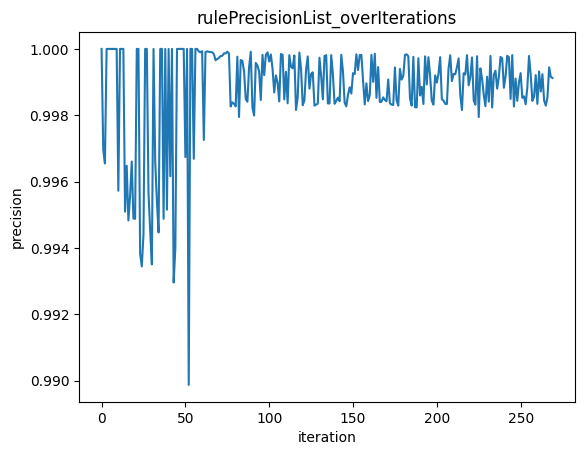

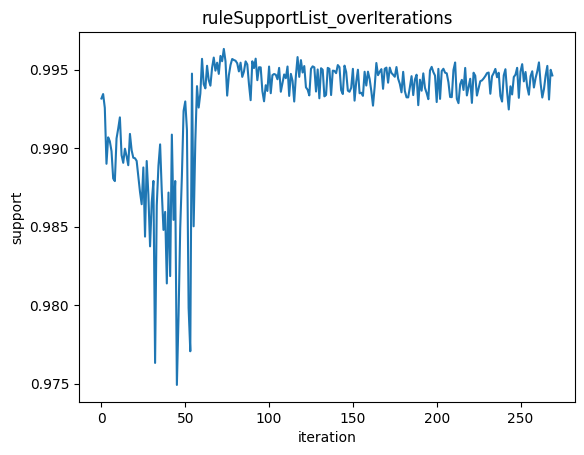

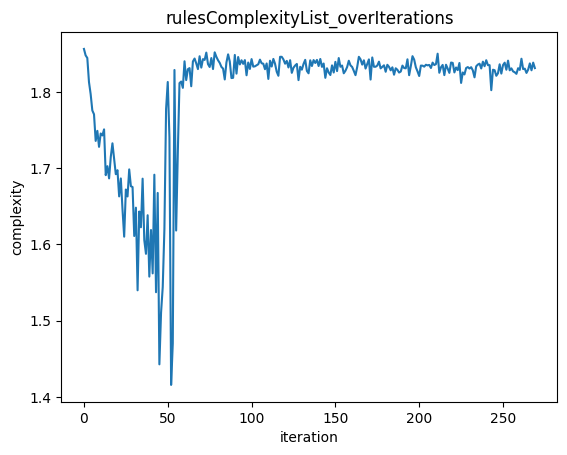

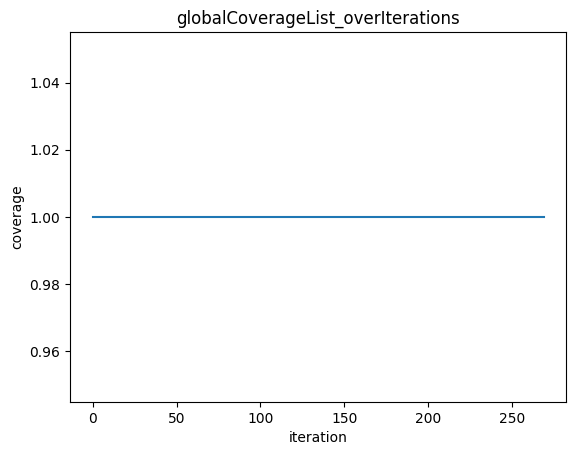

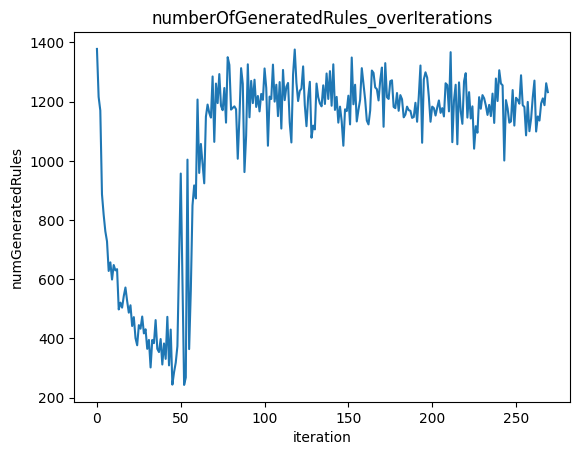

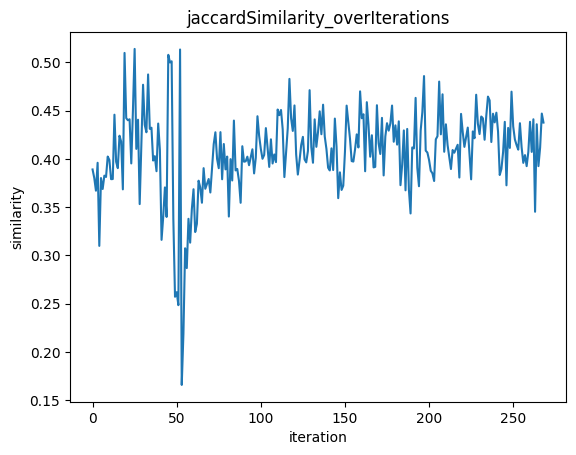

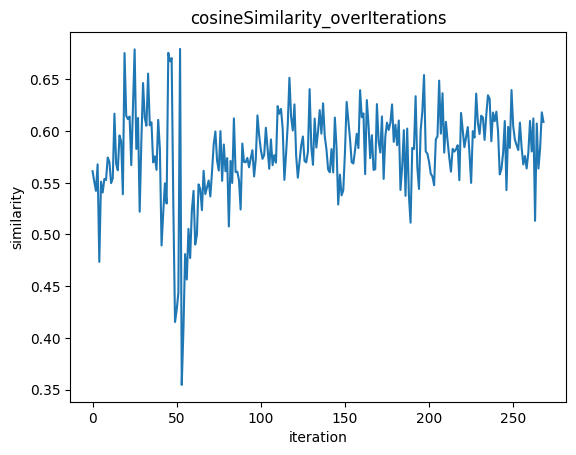

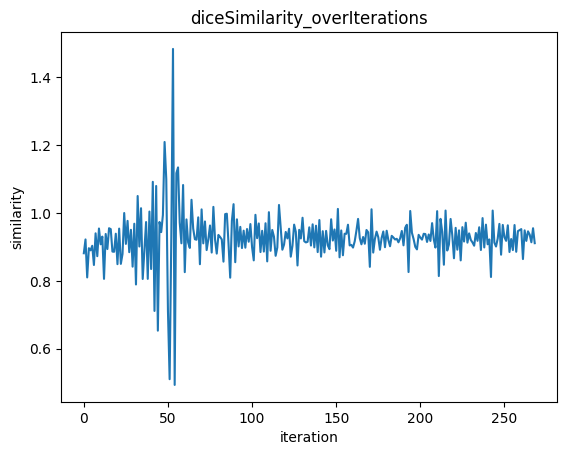

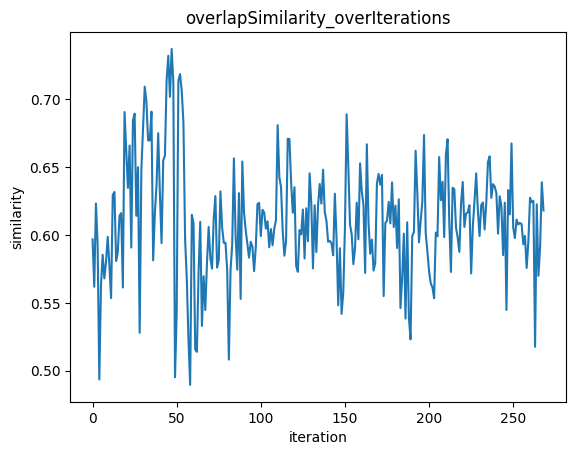

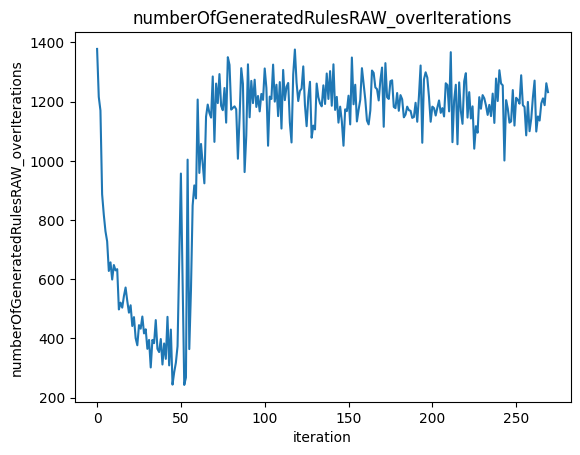

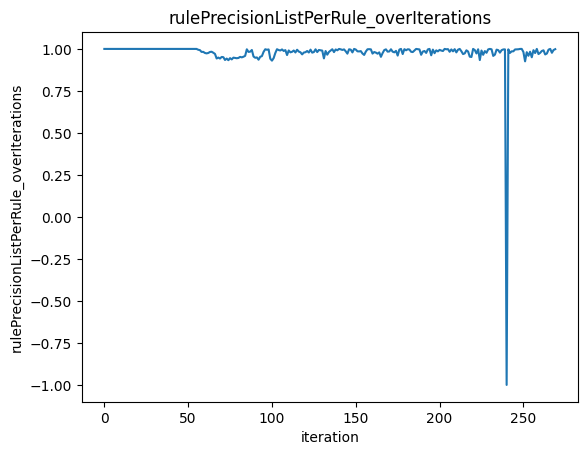

In [9]:
rules_data = np.load(pathToNPZ , allow_pickle=True)

pathToDiscriminative_rules = "./NLP_Results/rulesResults/discriminative_rules/"
pathToCharacteristic_rules = "./NLP_Results/rulesResults/characteristic_rules"
resultPaths_dicriminative_rules = os.listdir(pathToDiscriminative_rules)
resultPaths_characteristic_rules = os.listdir(pathToCharacteristic_rules)
resultPaths_dicriminative_rules= np.sort(resultPaths_dicriminative_rules)

#get last generated rule

mostRecentResultPaths_discriminative = pathToDiscriminative_rules + (resultPaths_dicriminative_rules[-1])
data = utils.loadData(mostRecentResultPaths_discriminative)
temp_rules_list_overIterations = data["rules_list_overIterations"]
trackedRules_OHE = cega_utils.trackRulesList(temp_rules_list_overIterations)
utils.appendToNPZ(pathToNPZ, "trackedRules_OHE", trackedRules_OHE)

plotResults.plotRulesResults(data)
_t_end = time()
print(f"Training finished in {int(_t_end - _t_start)} s")